#Import datasets

In [76]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the first dataset and assign it to variable 'shooting'
shooting = pd.read_csv('shooting.csv')

# Display the first few rows of the shooting dataset
print("Shooting Dataset:")
print(shooting.head())

# Read the second dataset and assign it to variable 'mci'
mci = pd.read_csv('mci.csv')

# Display the first few rows of the mci dataset
print("\nMCI Dataset:")
print(mci.head())


Shooting Dataset:
           X          Y  OBJECTID EVENT_UNIQUE_ID                OCC_DATE  \
0 -79.234955  43.781528         1   GO-2004397105  2004/05/15 04:00:00+00   
1 -79.618218  43.733547         2   GO-2004600109  2004/07/26 04:00:00+00   
2 -79.518759  43.769157         3   GO-2004311851  2004/05/14 04:00:00+00   
3 -79.378870  43.660665         4   GO-2004736004  2004/12/19 05:00:00+00   
4 -79.212435  43.812075         5   GO-2004303455  2004/04/12 04:00:00+00   

   OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  OCC_DAY  ...  OCC_TIME_RANGE  \
0      2004       May  Saturday      136       15  ...           Night   
1      2004      July    Monday      208       26  ...         Evening   
2      2004       May    Friday      135       14  ...       Afternoon   
3      2004  December    Sunday      354       19  ...           Night   
4      2004     April    Monday      103       12  ...         Evening   

  DIVISION DEATH  INJURIES  HOOD_158       NEIGHBOURHOOD_158 HOOD_140  \
0


MCI Dataset:
   _id EVENT_UNIQUE_ID REPORT_DATE OCC_DATE  REPORT_YEAR REPORT_MONTH  \
0    1  GO-20141260264         NaN      NaN         2014      January   
1    2  GO-20141260033         NaN      NaN         2014      January   
2    3  GO-20141259834         NaN      NaN         2014      January   
3    4  GO-20141264084         NaN      NaN         2014      January   
4    5  GO-20141260577         NaN      NaN         2014      January   

   REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...  \
0           1           1  Wednesday             1  ...   
1           1           1  Wednesday             2  ...   
2           1           1  Wednesday             0  ...   
3           1           1  Wednesday            22  ...   
4           1           1  Wednesday             4  ...   

                                       LOCATION_TYPE PREMISES_TYPE  UCR_CODE  \
0                                           Go Train       Transit      1430   
1  Single Home, House (Attach Ga

#Data Integration

##Step 1: Process performed to integrate two datasets

###1.1 Identify common and unique columns



In [78]:
# Get the columns of each dataset
shooting_columns = set(shooting.columns)
mci_columns = set(mci.columns)

# Initialize lists to store matching columns and unique columns for each dataset
matching_columns = []
shooting_unique_columns = []
mci_unique_columns = []

# Iterate through columns of shooting dataset
for column in shooting_columns:
    # Check if the column exists in mci dataset
    if column in mci_columns:
        matching_columns.append(column)
    else:
        shooting_unique_columns.append(column)

# Iterate through columns of mci dataset
for column in mci_columns:
    # Check if the column exists in shooting dataset
    if column not in shooting_columns:
        mci_unique_columns.append(column)

# Display the lists of matching columns and unique columns for each dataset
print("Matching Columns:")
print(matching_columns)

print("\nUnique Columns in 'shooting' Dataset:")
print(shooting_unique_columns)

print("\nUnique Columns in 'mci' Dataset:")
print(mci_unique_columns)

Matching Columns:
['HOOD_158', 'OCC_DAY', 'DIVISION', 'NEIGHBOURHOOD_158', 'HOOD_140', 'OCC_HOUR', 'OCC_DOY', 'EVENT_UNIQUE_ID', 'OCC_DOW', 'OCC_DATE', 'OCC_MONTH', 'OCC_YEAR', 'NEIGHBOURHOOD_140']

Unique Columns in 'shooting' Dataset:
['LAT_WGS84', 'OBJECTID', 'LONG_WGS84', 'OCC_TIME_RANGE', 'INJURIES', 'Y', 'DEATH', 'X']

Unique Columns in 'mci' Dataset:
['REPORT_HOUR', 'UCR_EXT', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_MONTH', 'PREMISES_TYPE', 'REPORT_YEAR', 'REPORT_DAY', 'REPORT_DATE', 'LOCATION_TYPE', 'OFFENCE', '_id', 'UCR_CODE', 'MCI_CATEGORY']


###1.2 Remove unwanted columns from mci dataset

In [79]:
# Print the column names of the mci
print(mci.columns)

# List of columns to drop
mci_columns_to_drop = [
    'REPORT_DOW',
    'UCR_EXT',
    'REPORT_DAY',
    'REPORT_MONTH',
    'UCR_CODE',
    'REPORT_HOUR',
    'REPORT_YEAR',
    'PREMISES_TYPE',
    'REPORT_DATE',
    '_id',
    'REPORT_DOY',
    'LOCATION_TYPE'
]

# Assign the result of dropping columns to a new DataFrame
mci1 = mci.drop(columns=mci_columns_to_drop)

# Print the modified columns of the new DataFrame
print(mci1.columns)

Index(['_id', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140'],
      dtype='object')
Index(['EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY',
       'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'OFFENCE', 'MCI_CATEGORY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140'],
      dtype='object')


###1.3 Remove unwanted columns from shooting dataset

In [80]:
# Print the column names of the shooting dataset
print(shooting.columns)

# List of columns to drop
shooting_columns_to_drop = ["Y", "X", "LONG_WGS84", "LAT_WGS84", "OBJECTID"]

# Assign the result of dropping columns to a new DataFrame
shooting1 = shooting.drop(columns=shooting_columns_to_drop)


# Print the modified columns of the new DataFrame
print(shooting1.columns)

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR',
       'OCC_MONTH', 'OCC_DOW', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR',
       'OCC_TIME_RANGE', 'DIVISION', 'DEATH', 'INJURIES', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84',
       'LAT_WGS84'],
      dtype='object')
Index(['EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DOW',
       'OCC_DOY', 'OCC_DAY', 'OCC_HOUR', 'OCC_TIME_RANGE', 'DIVISION', 'DEATH',
       'INJURIES', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140'],
      dtype='object')


##Step 2: Examples of data integration cases

###2.1 Different formats of OCC_DATE column
Justification for dropping 'OCC_DATE' columns:


*   The information from 'OCC_DATE' columns may already be present in other atomic columns.
*   Dropping these columns avoids unnecessary transformation and reduces redundancy.



In [81]:
# Showcase different formats of 'OCC_DATE' column in mci1 DataFrame
print("Formats of 'OCC_DATE' column in mci1 DataFrame:")
print(mci1['OCC_DATE'].head())

# Showcase non-null values of 'OCC_DATE' column in mci1 DataFrame
print("\nNon-null values of 'OCC_DATE' column in mci1 DataFrame:")
print(mci1['OCC_DATE'].dropna().head())

# Showcase different formats of 'OCC_DATE' column in shooting1 DataFrame
print("\nFormats of 'OCC_DATE' column in shooting1 DataFrame:")
print(shooting1['OCC_DATE'].head())

# Assign the result of dropping columns to a new DataFrame
shooting2 = shooting1.drop(columns='OCC_DATE')
mci2 = mci1.drop(columns='OCC_DATE')

Formats of 'OCC_DATE' column in mci1 DataFrame:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: OCC_DATE, dtype: object

Non-null values of 'OCC_DATE' column in mci1 DataFrame:
100    1388-03-04
175    1388-07-25
176    1388-07-25
177    1388-07-25
178    1388-07-25
Name: OCC_DATE, dtype: object

Formats of 'OCC_DATE' column in shooting1 DataFrame:
0    2004/05/15 04:00:00+00
1    2004/07/26 04:00:00+00
2    2004/05/14 04:00:00+00
3    2004/12/19 05:00:00+00
4    2004/04/12 04:00:00+00
Name: OCC_DATE, dtype: object


###2.2 Shooting dataset has OCC_TIME_RANGE column
Contains values: night, morning, afternoon and evening based on the time of the police report. We add the same column to mci dataset and populate it with appropriate values.

In [82]:
# Define a function to map OCC_HOUR values to time ranges
def map_time_range(hour):
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create the 'OCC_TIME_RANGE' column
mci2['OCC_TIME_RANGE'] = mci2['OCC_HOUR'].apply(map_time_range)

# Print the first few rows of the modified dataset
print(mci2.head())

  EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  OCC_HOUR  \
0  GO-20141260264    2014.0   January      1.0      1.0  Wednesday          1   
1  GO-20141260033    2013.0  December     31.0    365.0  Tuesday           22   
2  GO-20141259834    2014.0   January      1.0      1.0  Wednesday          0   
3  GO-20141264084    2013.0  December     31.0    365.0  Tuesday           21   
4  GO-20141260577    2014.0   January      1.0      1.0  Wednesday          2   

  DIVISION              OFFENCE MCI_CATEGORY HOOD_158  \
0      D43              Assault      Assault      143   
1      D42              Assault      Assault      144   
2      D53  Assault With Weapon      Assault       55   
3      D32  Assault Bodily Harm      Assault       27   
4      NSA   Robbery - Swarming      Robbery      NSA   

         NEIGHBOURHOOD_158 HOOD_140             NEIGHBOURHOOD_140  \
0               West Rouge      131                   Rouge (131)   
1      Morningside Heights      

### 2.3 Add MCI_CATEGORY and OFFENCE columns to shooting dataset
Rows that exist in mci dataset should have same values. The rest of the rows are populated with null values to be dealt with during data cleaning (Suggestion: create a separate MCI_CATEGORY value for firearm discharge and various subcategories of OFFENCE based on number of killed and/or injured people)

In [83]:
# Perform a merge operation on 'EVENT_UNIQUE_ID' to bring MCI_CATEGORY and OFFENCE columns from 'mci2' dataset to 'shooting3' dataset
shooting3 = pd.merge(shooting2, mci2[['EVENT_UNIQUE_ID', 'MCI_CATEGORY', 'OFFENCE']], on='EVENT_UNIQUE_ID', how='left')

# Print the first few rows of the merged dataset
print(shooting3.head())

# Count the number of null values in the specified column
null_count = shooting3['MCI_CATEGORY'].isnull().sum()
not_null_count = shooting3['MCI_CATEGORY'].notnull().sum()

# Print the count of null values
print("Number of null values in column", 'MCI_CATEGORY', ":", null_count)
print("Number of not null values in column", 'MCI_CATEGORY', ":", not_null_count)

  EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  OCC_DAY  OCC_HOUR  \
0   GO-2004397105      2004       May  Saturday      136       15         1   
1   GO-2004600109      2004      July    Monday      208       26        23   
2   GO-2004311851      2004       May    Friday      135       14        16   
3   GO-2004736004      2004  December    Sunday      354       19         0   
4   GO-2004303455      2004     April    Monday      103       12        22   

  OCC_TIME_RANGE DIVISION  DEATH  INJURIES HOOD_158       NEIGHBOURHOOD_158  \
0          Night      D41      0         0      142            Woburn North   
1        Evening      D23      0         0        1  West Humber-Clairville   
2      Afternoon      D31      1         1       24             Black Creek   
3          Night      D51      1         0      168     Downtown Yonge East   
4        Evening      D42      0         0      146            Malvern East   

  HOOD_140           NEIGHBOURHOOD_140 MCI_CATEGOR

###2.4 Add DEATH and INJURIES columns to the mci dataset.
For rows that exist in shooting dataset, use existing values. Set the rest of the values to 0, since we can assume that noone was killed or injured by a bullet unless it was a firearm discharge.

In [84]:
# Merge 'mci2' and 'shooting3' datasets based on 'EVENT_UNIQUE_ID'
mci3 = pd.merge(mci2, shooting3[['EVENT_UNIQUE_ID', 'DEATH', 'INJURIES']], on='EVENT_UNIQUE_ID', how='left')

# Convert zero values in 'DEATH' and 'INJURIES' columns to integers
mci3['DEATH'] = mci3['DEATH'].fillna(0).astype(int)
mci3['INJURIES'] = mci3['INJURIES'].fillna(0).astype(int)

# Print the first few rows of the merged dataset
print(mci3.head())


  EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  OCC_HOUR  \
0  GO-20141260264    2014.0   January      1.0      1.0  Wednesday          1   
1  GO-20141260033    2013.0  December     31.0    365.0  Tuesday           22   
2  GO-20141259834    2014.0   January      1.0      1.0  Wednesday          0   
3  GO-20141264084    2013.0  December     31.0    365.0  Tuesday           21   
4  GO-20141260577    2014.0   January      1.0      1.0  Wednesday          2   

  DIVISION              OFFENCE MCI_CATEGORY HOOD_158  \
0      D43              Assault      Assault      143   
1      D42              Assault      Assault      144   
2      D53  Assault With Weapon      Assault       55   
3      D32  Assault Bodily Harm      Assault       27   
4      NSA   Robbery - Swarming      Robbery      NSA   

         NEIGHBOURHOOD_158 HOOD_140             NEIGHBOURHOOD_140  \
0               West Rouge      131                   Rouge (131)   
1      Morningside Heights      

##Step 3: Finishing Touches

###3.1 Make sure two datasets are compatible

In [85]:
# Print columns of mci3 DataFrame
print('Columns of mci3:\n')
print(mci3.columns)

# Print columns of shooting3 DataFrame
print('\nColumns of shooting3:\n')
print(shooting3.columns)

# Check if the sets of columns in mci3 and shooting3 are equal
if set(mci3.columns) == set(shooting3.columns):
    print('\nGood to go!')
else:
    print('\nToo soon')


Columns of mci3:

Index(['EVENT_UNIQUE_ID', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY',
       'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'OFFENCE', 'MCI_CATEGORY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'OCC_TIME_RANGE', 'DEATH', 'INJURIES'],
      dtype='object')

Columns of shooting3:

Index(['EVENT_UNIQUE_ID', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DOW', 'OCC_DOY',
       'OCC_DAY', 'OCC_HOUR', 'OCC_TIME_RANGE', 'DIVISION', 'DEATH',
       'INJURIES', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'MCI_CATEGORY', 'OFFENCE'],
      dtype='object')

Good to go!


###3.2 Moment of truth

In [86]:
# Concatenate df1 and df2 along rows
motherload = pd.concat([mci3, shooting3], axis=0)

# Print the concatenated DataFrame
print(motherload)

     EVENT_UNIQUE_ID  OCC_YEAR  OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  \
0     GO-20141260264    2014.0    January      1.0      1.0  Wednesday    
1     GO-20141260033    2013.0   December     31.0    365.0  Tuesday      
2     GO-20141259834    2014.0    January      1.0      1.0  Wednesday    
3     GO-20141264084    2013.0   December     31.0    365.0  Tuesday      
4     GO-20141260577    2014.0    January      1.0      1.0  Wednesday    
...              ...       ...        ...      ...      ...         ...   
6764  GO-20221362949    2022.0       July     17.0    198.0      Sunday   
6765   GO-2022336423    2022.0   February     21.0     52.0      Monday   
6766  GO-20221765442    2022.0  September     11.0    254.0      Sunday   
6767  GO-20221765442    2022.0  September     11.0    254.0      Sunday   
6768   GO-2022783839    2022.0      April     27.0    117.0   Wednesday   

      OCC_HOUR DIVISION                        OFFENCE MCI_CATEGORY HOOD_158  \
0            1     

###3.3 Fix Minor details

In [87]:
# Convert values in 'OCC_YEAR', 'OCC_DAY', and 'OCC_DOY' columns of motherload DataFrame to integers
# Replace NaN values with a default value (0 in this case)
motherload['OCC_YEAR'] = motherload['OCC_YEAR'].fillna(0).astype(int)
motherload['OCC_DAY'] = motherload['OCC_DAY'].fillna(0).astype(int)
motherload['OCC_DOY'] = motherload['OCC_DOY'].fillna(0).astype(int)

# Define the desired column order
desired_column_order = [
    'EVENT_UNIQUE_ID',
    'OCC_YEAR',
    'OCC_MONTH',
    'OCC_DAY',
    'OCC_DOY',
    'OCC_DOW',
    'OCC_HOUR',
    'OCC_TIME_RANGE',
    'DIVISION',
    'MCI_CATEGORY',
    'OFFENCE',
    'DEATH',
    'INJURIES',
    'HOOD_158',
    'NEIGHBOURHOOD_158',
    'HOOD_140',
    'NEIGHBOURHOOD_140']

# Reassign the DataFrame with the desired column order
motherload1 = motherload[desired_column_order]

# Print the first few rows of the DataFrame to verify the changes
print(motherload1.head())
print(motherload1.shape)
print(motherload1.columns)

# Sort the DataFrame by multiple columns
motherload2 = motherload1.sort_values(by=['OCC_YEAR', 'OCC_DOY', 'OCC_HOUR', 'EVENT_UNIQUE_ID'], ascending=True)

# Print the sorted DataFrame
print(motherload2)

# Write dataframe to a CSV file
motherload2.to_csv('crime_integrated.csv', index=False)



  EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  OCC_HOUR  \
0  GO-20141260264      2014   January        1        1  Wednesday          1   
1  GO-20141260033      2013  December       31      365  Tuesday           22   
2  GO-20141259834      2014   January        1        1  Wednesday          0   
3  GO-20141264084      2013  December       31      365  Tuesday           21   
4  GO-20141260577      2014   January        1        1  Wednesday          2   

  OCC_TIME_RANGE DIVISION MCI_CATEGORY              OFFENCE  DEATH  INJURIES  \
0          Night      D43      Assault              Assault      0         0   
1        Evening      D42      Assault              Assault      0         0   
2          Night      D53      Assault  Assault With Weapon      0         0   
3        Evening      D32      Assault  Assault Bodily Harm      0         0   
4          Night      NSA      Robbery   Robbery - Swarming      0         0   

  HOOD_158        NEIGHBOURHOOD_

       EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  \
383     GO-20141292170         0       NaN        0        0         NaN   
5564    GO-20141672343         0       NaN        0        0         NaN   
5570    GO-20141672344         0       NaN        0        0         NaN   
5568    GO-20141672349         0       NaN        0        0         NaN   
9329    GO-20141947935         0       NaN        0        0         NaN   
...                ...       ...       ...      ...      ...         ...   
376591  GO-20232992925      2023  December       31      365  Sunday       
376481  GO-20232993060      2023  December       31      365  Sunday       
376569  GO-20232993252      2023  December       31      365  Sunday       
376482  GO-20232993321      2023  December       31      365  Sunday       
376522  GO-20232993455      2023  December       31      365  Sunday       

        OCC_HOUR OCC_TIME_RANGE DIVISION MCI_CATEGORY                 OFFENCE  \
383   

##Step 4: Detect Functional Dependencies and give examples

###4.1 Importing the integrated dataset


In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import CategoricalDtype
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Data Loading
df = pd.read_csv('crime_integrated.csv')

# Initial data description
print(df.describe())
print(df.info())

            OCC_YEAR        OCC_DAY        OCC_DOY       OCC_HOUR  \
count  383368.000000  383368.000000  383368.000000  383368.000000   
mean     2018.086189      15.468046     186.381889      12.551055   
std        34.478103       8.924166     104.077068       7.319422   
min         0.000000       0.000000       0.000000       0.000000   
25%      2016.000000       8.000000      98.000000       6.000000   
50%      2019.000000      16.000000     188.000000      14.000000   
75%      2021.000000      23.000000     276.000000      19.000000   
max      2023.000000      31.000000     366.000000      23.000000   

               DEATH       INJURIES  
count  383368.000000  383368.000000  
mean        0.001922       0.021953  
std         0.046293       0.226268  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         3.000000      24.000000  
<class 'pandas.core.frame.DataFrame'

###4.2 Converting categorical attributes to category

In [89]:
# Convert categorical attributes to category type if needed
df['MCI_CATEGORY'] = df['MCI_CATEGORY'].astype('category')
df['OFFENCE'] = df['OFFENCE'].astype('category')
df['NEIGHBOURHOOD_158'] = df['NEIGHBOURHOOD_158'].astype('category')
df['NEIGHBOURHOOD_140'] = df['NEIGHBOURHOOD_140'].astype('category')

# Define the order for days of the week as a categorical dtype
days_order = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

###4.3 Detecting Functional Dependencies

####4.3.1 Cramér's V for categorical-categorical association

In [90]:
# Function to calculate Cramér's V for categorical-categorical association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Correlation Analysis

## Select a subset of columns for the analysis
columns_for_analysis = ['OCC_HOUR', 'OCC_DOW', 'DIVISION', 'NEIGHBOURHOOD_140', 'NEIGHBOURHOOD_158', 'MCI_CATEGORY', 'OFFENCE']

## Calculate Cramér's V for each pair of variables
cramers_v_results = {}
for col in columns_for_analysis:
    if col != 'MCI_CATEGORY':  # We don't want to compare MCI_CATEGORY to itself
        cramers_v_results[f'MCI_CATEGORY vs {col}'] = cramers_v(df['MCI_CATEGORY'], df[col])
    if col != 'OFFENCE':  # We don't want to compare OFFENCE to itself
        cramers_v_results[f'OFFENCE vs {col}'] = cramers_v(df['OFFENCE'], df[col])

# Additionally, calculate Cramér's V between MCI_CATEGORY and OFFENCE
cramers_v_results['MCI_CATEGORY vs OFFENCE'] = cramers_v(df['MCI_CATEGORY'], df['OFFENCE'])

# Calculate and add the Cramér's V between 'neighbourhood_158' and 'neighbourhood_140'
cramers_v_results['NEIGHBOURHOOD_158 vs NEIGHBOURHOOD_140'] = cramers_v(df['NEIGHBOURHOOD_158'], df['NEIGHBOURHOOD_140'])

# Output the results
for key, value in cramers_v_results.items():
    print(f'{key}: {value:.3f}')

MCI_CATEGORY vs OCC_HOUR: 0.115
OFFENCE vs OCC_HOUR: 0.061
MCI_CATEGORY vs OCC_DOW: 0.052
OFFENCE vs OCC_DOW: 0.150
MCI_CATEGORY vs DIVISION: 0.126
OFFENCE vs DIVISION: 0.077
MCI_CATEGORY vs NEIGHBOURHOOD_140: 0.167
OFFENCE vs NEIGHBOURHOOD_140: 0.063
MCI_CATEGORY vs NEIGHBOURHOOD_158: 0.170
OFFENCE vs NEIGHBOURHOOD_158: 0.066
OFFENCE vs MCI_CATEGORY: 1.000
MCI_CATEGORY vs OFFENCE: 1.000
NEIGHBOURHOOD_158 vs NEIGHBOURHOOD_140: 0.987


####4.3.2 Decision Tree Classifier to find accuracy between "MCI_CATEGORY" AND "OFFENCE"

In [91]:
# Drop rows with any missing values in 'MCI_CATEGORY' or 'OFFENCE'
df_clean = df.dropna(subset=['MCI_CATEGORY', 'OFFENCE']).copy()

# Encode 'MCI_CATEGORY' to numerical values using the cleaned DataFrame
le = LabelEncoder()
df_clean['MCI_CATEGORY_encoded'] = le.fit_transform(df_clean['MCI_CATEGORY'])

# Prepare the data with the encoded values
X = df_clean[['MCI_CATEGORY_encoded']]  # Predictor, using df_clean
y = df_clean['OFFENCE']                 # Target, using df_clean

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Decision Tree classifier: {accuracy:.3f}')


Accuracy of Decision Tree classifier: 0.709


####4.3.3 Measuring Mutual Information between two variables

In [92]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

# Assuming 'NEIGHBOURHOOD_140' needs to be encoded as well
if 'NEIGHBOURHOOD_140' in df_clean.columns and df_clean['NEIGHBOURHOOD_140'].dtype == 'object':
    le_neighbourhood = LabelEncoder()
    df_clean['NEIGHBOURHOOD_140_encoded'] = le_neighbourhood.fit_transform(df_clean['NEIGHBOURHOOD_140'])
elif 'NEIGHBOURHOOD_140_encoded' not in df_clean.columns:
    # If 'NEIGHBOURHOOD_158' is already numeric, directly use it; otherwise, this block can be adjusted as needed.
    df_clean['NEIGHBOURHOOD_140_encoded'] = df_clean['NEIGHBOURHOOD_140']

# Ensure 'OFFENCE' is encoded
if 'OFFENCE_encoded' not in df_clean.columns:
    le_offence = LabelEncoder()
    df_clean['OFFENCE_encoded'] = le_offence.fit_transform(df_clean['OFFENCE'])

# Now that MCI_CATEGORY, NEIGHBOURHOOD_158, and OFFENCE have been encoded, proceed with mutual information calculation
X = df_clean[['MCI_CATEGORY_encoded', 'NEIGHBOURHOOD_140_encoded']]  # Features including MCI_CATEGORY and NEIGHBOURHOOD_158
y_encoded = df_clean['OFFENCE_encoded']  # The target variable is now correctly encoded

# Calculate mutual information
mi_scores = mutual_info_classif(X, y_encoded, discrete_features=True)

# Print mutual information scores
print(f"Mutual Information between MCI_CATEGORY and OFFENCE: {mi_scores[0]:.3f}")
print(f"Mutual Information between NEIGHBOURHOOD_140 and OFFENCE: {mi_scores[1]:.3f}")


Mutual Information between MCI_CATEGORY and OFFENCE: 1.264
Mutual Information between NEIGHBOURHOOD_140 and OFFENCE: 0.095


###4.4 Grouping and Aggregation for Exporatory Data Analysis (EDA)

In [93]:
# Grouping and Aggregation for exploratory analysis
grouped_df = df.groupby(['OCC_HOUR', 'NEIGHBOURHOOD_140', 'MCI_CATEGORY']).size().reset_index(name='counts')
print(grouped_df.head())

   OCC_HOUR      NEIGHBOURHOOD_140     MCI_CATEGORY  counts
0         0  Agincourt North (129)          Assault      71
1         0  Agincourt North (129)       Auto Theft      21
2         0  Agincourt North (129)  Break and Enter      14
3         0  Agincourt North (129)          Robbery      13
4         0  Agincourt North (129)       Theft Over       2


C:\Users\User\AppData\Local\Temp\ipykernel_9052\1709999654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['OCC_HOUR', 'NEIGHBOURHOOD_140', 'MCI_CATEGORY']).size().reset_index(name='counts')


####4.4.1 Measuring Mutual information based on above results

In [94]:
# Reshape OCC_HOUR for mutual_info_classif
X_occ_hour = df_clean['OCC_HOUR'].to_numpy().reshape(-1, 1)

# Mutual Information: OCC_HOUR and MCI_CATEGORY
mi_occ_hour_mci = mutual_info_classif(X_occ_hour, df_clean['MCI_CATEGORY_encoded'], discrete_features=True)
print(f"Mutual Information between OCC_HOUR and MCI_CATEGORY: {mi_occ_hour_mci[0]:.3f}")

# Mutual Information: NEIGHBOURHOOD_140 and MCI_CATEGORY
# Since NEIGHBOURHOOD_140_encoded is already aligned with MCI_CATEGORY_encoded, no need to reshape
mi_neigh_mci = mutual_info_classif(df_clean[['NEIGHBOURHOOD_140_encoded']], df_clean['MCI_CATEGORY_encoded'], discrete_features=True)
print(f"Mutual Information between NEIGHBOURHOOD_140 and MCI_CATEGORY: {mi_neigh_mci[0]:.3f}")

# Mutual Information: OCC_HOUR and NEIGHBOURHOOD_140
# Use NEIGHBOURHOOD_140_encoded as the target this time
mi_occ_hour_neigh = mutual_info_classif(X_occ_hour, df_clean['NEIGHBOURHOOD_140_encoded'], discrete_features=True)
print(f"Mutual Information between OCC_HOUR and NEIGHBOURHOOD_140: {mi_occ_hour_neigh[0]:.3f}")

Mutual Information between OCC_HOUR and MCI_CATEGORY: 0.025
Mutual Information between NEIGHBOURHOOD_140 and MCI_CATEGORY: 0.056
Mutual Information between OCC_HOUR and NEIGHBOURHOOD_140: 0.018


###4.5 Mappings Exploration

In [95]:
simplified_grouping = df.groupby(['OCC_HOUR', 'MCI_CATEGORY', 'NEIGHBOURHOOD_140']).size().reset_index(name='counts')
print(simplified_grouping.head())

   OCC_HOUR MCI_CATEGORY                   NEIGHBOURHOOD_140  counts
0         0      Assault               Agincourt North (129)      71
1         0      Assault  Agincourt South-Malvern West (128)     110
2         0      Assault                      Alderwood (20)      20
3         0      Assault                          Annex (95)     181
4         0      Assault              Banbury-Don Mills (42)      64


C:\Users\User\AppData\Local\Temp\ipykernel_9052\3877531095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  simplified_grouping = df.groupby(['OCC_HOUR', 'MCI_CATEGORY', 'NEIGHBOURHOOD_140']).size().reset_index(name='counts')


####4.5.1 Creating heatmap after grouping the variables to understand the data better

C:\Users\User\AppData\Local\Temp\ipykernel_9052\4083378497.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  simplified_grouping = df.groupby(['OCC_HOUR', 'NEIGHBOURHOOD_140', 'MCI_CATEGORY']).size().reset_index(name='counts')


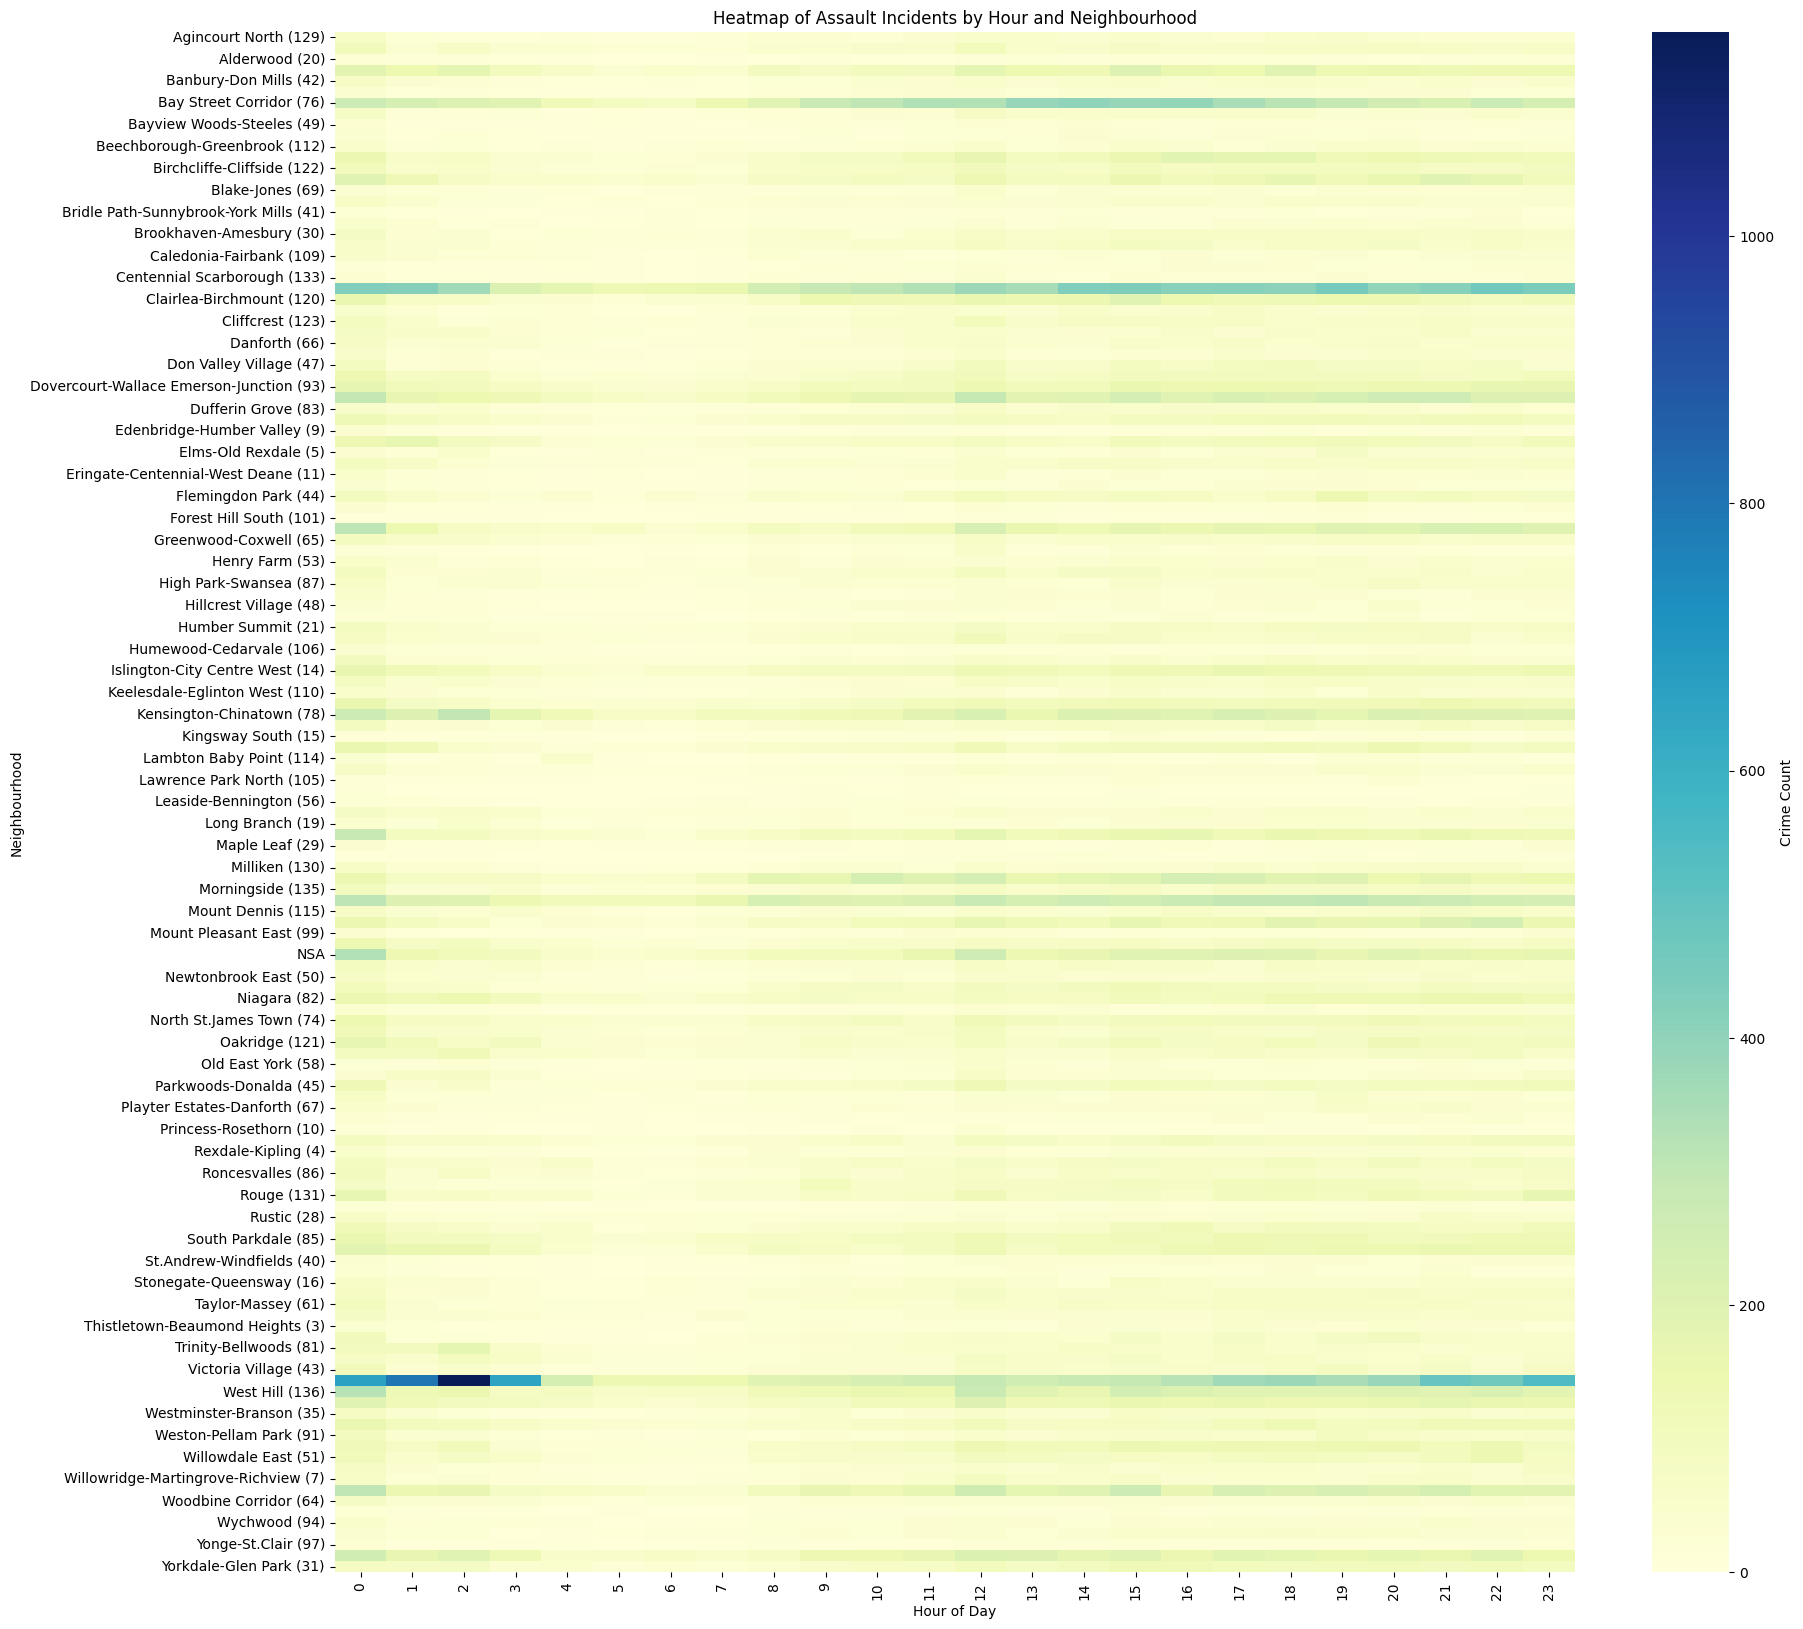

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by OCC_HOUR, NEIGHBOURHOOD_140, and MCI_CATEGORY with counts
simplified_grouping = df.groupby(['OCC_HOUR', 'NEIGHBOURHOOD_140', 'MCI_CATEGORY']).size().reset_index(name='counts')

# Pivot the data for heatmap
# For the sake of simplicity and visualization effectiveness, let's focus on a single crime type, e.g., 'Assault'
assault_data = simplified_grouping[simplified_grouping['MCI_CATEGORY'] == 'Assault']
pivot_table = assault_data.pivot(index="NEIGHBOURHOOD_140", columns="OCC_HOUR", values="counts")

# Plotting the heatmap
plt.figure(figsize=(20, 20))  # Increase figure size
sns.heatmap(pivot_table, annot=False, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Crime Count'})
plt.title('Heatmap of Assault Incidents by Hour and Neighbourhood')
plt.xlabel('Hour of Day')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.yticks(rotation=0)  # Ensure the y labels are horizontal for better readability
plt.show()

### 4.6 Data Preparation for Correlation and Visualizations

In [97]:
# Replace non-finite values with a default value
df['OCC_HOUR'] = df['OCC_HOUR'].fillna(-1)

# Convert 'OCC_HOUR' to int
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)

# Trim spaces from 'OCC_DOW' and convert to category with specified order
df['OCC_DOW'] = df['OCC_DOW'].str.strip().astype(days_order)

# Filling the null values in 'OCC_DOW' with the mode (most common value)
mode_value = df['OCC_DOW'].mode()[0]
df['OCC_DOW'] = df['OCC_DOW'].fillna(mode_value)

###4.7 Visualizations

####4.7.1 Counts of crimes per day of the week.

C:\Users\User\AppData\Local\Temp\ipykernel_9052\2704580925.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_counts_per_day = df.groupby('OCC_DOW').size().reset_index(name='counts')


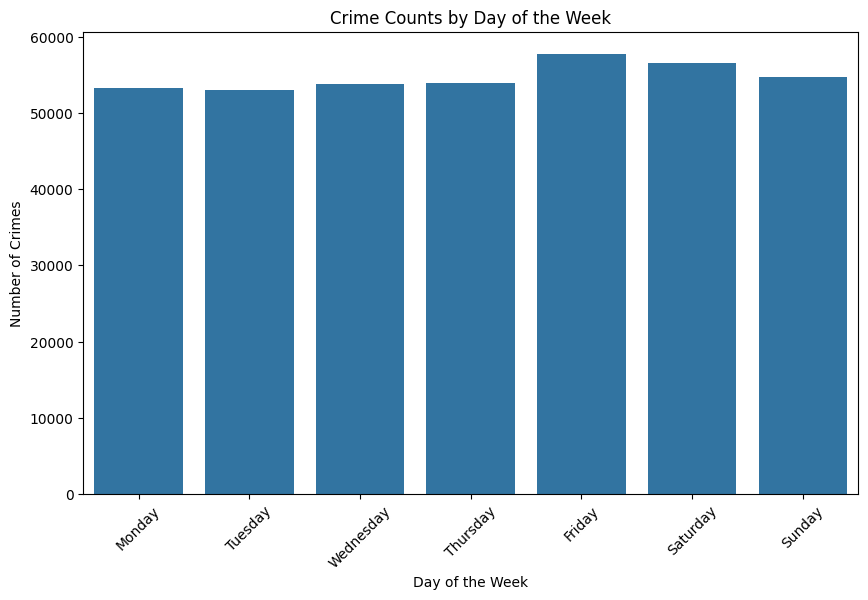

In [98]:
# Visualization of counts of crimes per day of the week.
crime_counts_per_day = df.groupby('OCC_DOW').size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
sns.barplot(x='OCC_DOW', y='counts', data=crime_counts_per_day, order=days_order.categories)
plt.title('Crime Counts by Day of the Week')
plt.ylabel('Number of Crimes')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

####4.7.2 Crime Count by Hour of Day

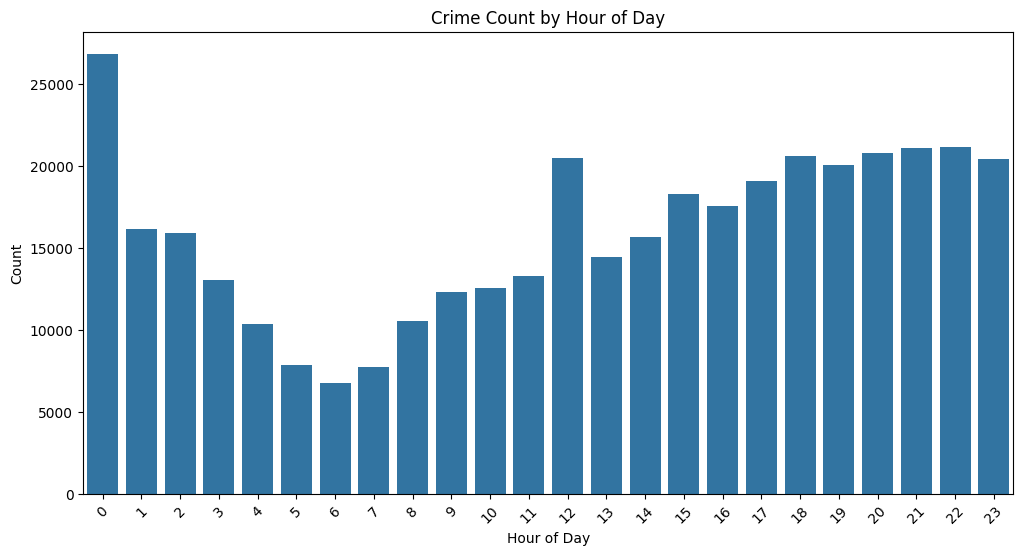

In [99]:
# Crime Count by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(x='OCC_HOUR', data=df)
plt.title('Crime Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4.7.3 Crime Count by Category

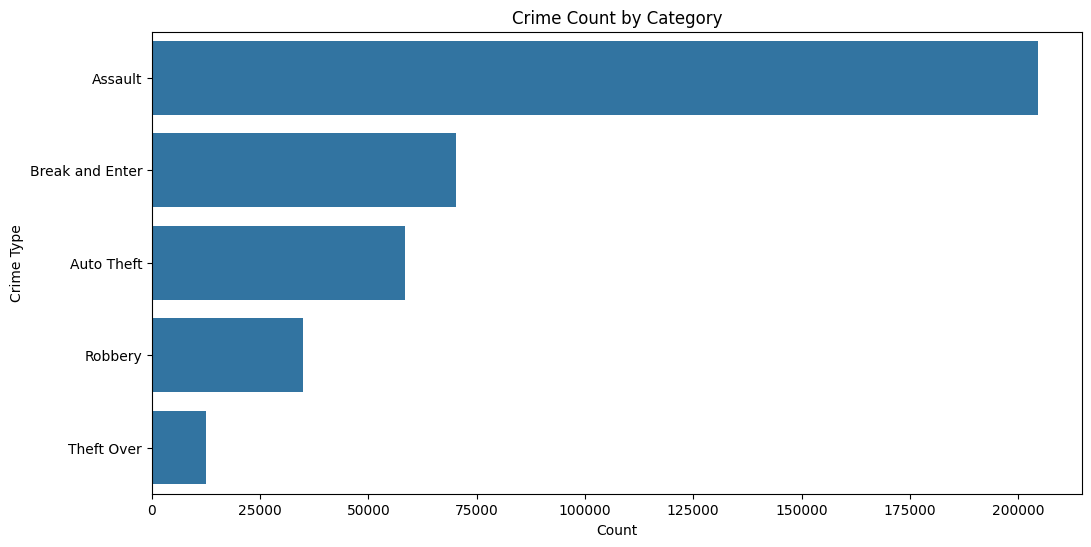

In [100]:
#Crime Count by Category
plt.figure(figsize=(12, 6))
sns.countplot(y='MCI_CATEGORY', data=df, order = df['MCI_CATEGORY'].value_counts().index)
plt.title('Crime Count by Category')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

####4.7.4 Crimes in Different Neighbourhoods

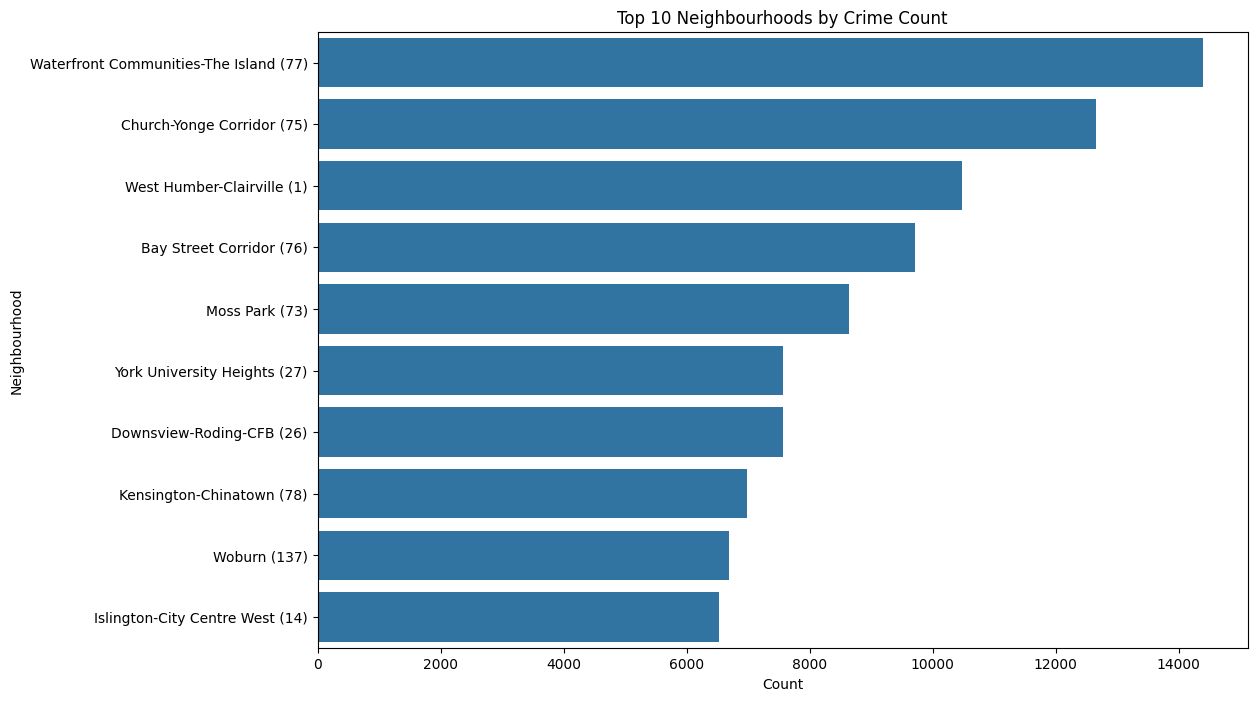

In [101]:
# Crimes in Different Neighbourhoods
# Note: Due to potentially high number of neighbourhoods, we'll display top 10
top_neighbourhoods = df['NEIGHBOURHOOD_140'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.countplot(y='NEIGHBOURHOOD_140', data=df, order=top_neighbourhoods)
plt.title('Top 10 Neighbourhoods by Crime Count')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

####4.7.5 Heatmap of Crimes by Day of Week and Hour

C:\Users\User\AppData\Local\Temp\ipykernel_9052\3683830017.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_heatmap_data = df.groupby(['OCC_DOW', 'OCC_HOUR']).size().unstack()


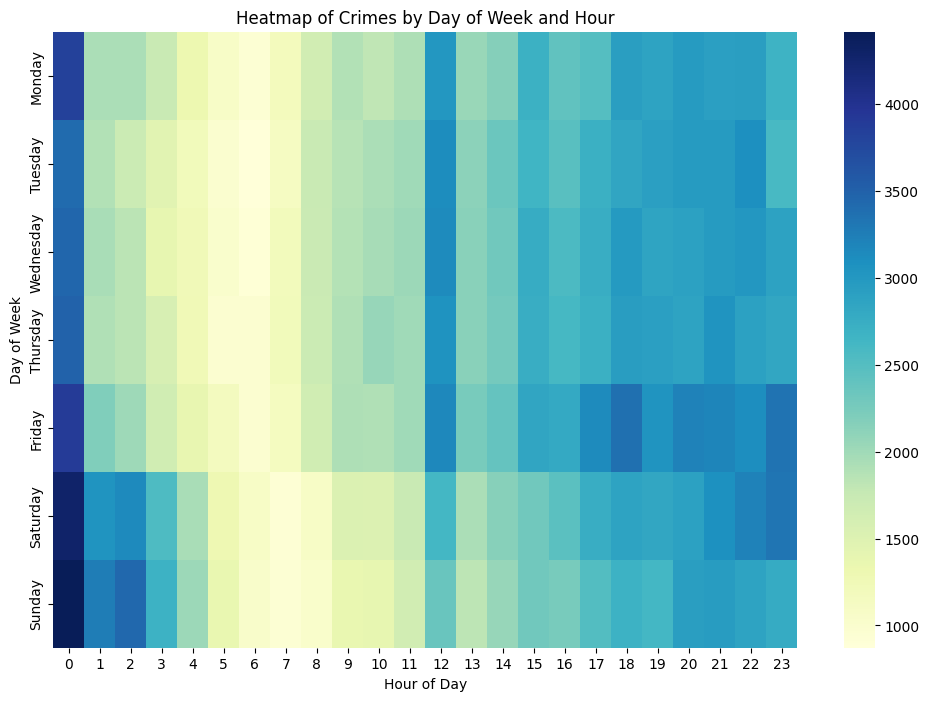

In [102]:
# Heatmap of Crimes by Day of Week and Hour
crime_heatmap_data = df.groupby(['OCC_DOW', 'OCC_HOUR']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, cmap="YlGnBu")
plt.title('Heatmap of Crimes by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

#Data Preparation

##Step 5.1: Data Preparation - Cleaning

5.1.1 Missing neighborhood data

In [103]:
import pandas as pd

df = pd.read_csv('crime_integrated.csv')


In [104]:
# DROP THE ROWS WITH 'NSA' VALUES IN 'NEIGHBOURHOOD_158' COLUMN
df = df.drop(df[df['NEIGHBOURHOOD_158'].str.contains('NSA', na=False)].index)

# DROP THE ROWS WITH 'NSA' VALUES IN 'NEIGHBOURHOOD_140' COLUMN
df = df.drop(df[df['NEIGHBOURHOOD_140'].str.contains('NSA', na=False)].index)

In [105]:
# CHECK THE %AGE OF NSA IN COLUMNS, IF ANY
total = (df == 'NSA').sum().sort_values(ascending=False)
percent = ((df == 'NSA').sum() / df['DEATH'].count()).sort_values(ascending=False)
missing_data_1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_1

,Total,Percent
EVENT_UNIQUE_ID,0,0.0
MCI_CATEGORY,0,0.0
HOOD_140,0,0.0
NEIGHBOURHOOD_158,0,0.0
HOOD_158,0,0.0
INJURIES,0,0.0
DEATH,0,0.0
OFFENCE,0,0.0
DIVISION,0,0.0
OCC_YEAR,0,0.0


5.1.2 Empty day of week (OCC_DOW) and month (OCC_MONTH) data

In [106]:
# df['OCC_MONTH'].fillna(0, inplace=True)
# df['OCC_DOW'].fillna(0, inplace=True)

In [107]:
# find and remove the 0s in month, day, doy etc

total = (df == 0).sum().sort_values(ascending=False)
percent = ((df == 0).sum() / df['OCC_TIME_RANGE'].count()).sort_values(ascending=False)
missing_data_1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_1


,Total,Percent
DEATH,376521,0.998179
INJURIES,371713,0.985432
OCC_HOUR,26248,0.069585
OCC_DAY,99,0.000262
OCC_DOY,99,0.000262
OCC_YEAR,99,0.000262
EVENT_UNIQUE_ID,0,0.000000
HOOD_140,0,0.000000
NEIGHBOURHOOD_158,0,0.000000
HOOD_158,0,0.000000


In [108]:
df = df[df['OCC_DAY'] != 0]

5. Empty OFFENCE and MCI_CATEGORY values

In [109]:

# Identify rows in df where MCI_CATEGORY is empty
missing_category_rows = mci[mci['MCI_CATEGORY'].isnull()]

merged_df = missing_category_rows.merge(mci[['EVENT_UNIQUE_ID', 'MCI_CATEGORY', 'OFFENCE']], on='EVENT_UNIQUE_ID', how='left')

merged_df = merged_df.drop(columns=['MCI_CATEGORY_x', 'OFFENCE_x'])
merged_df = merged_df.rename(columns={'MCI_CATEGORY_y': 'MCI_CATEGORY', 'OFFENCE_y': 'OFFENCE'})

# Update missing values in the original DataFrame
mci['MCI_CATEGORY'] = merged_df['MCI_CATEGORY'].fillna(mci['MCI_CATEGORY'])
mci['OFFENCE'] = merged_df['OFFENCE'].fillna(mci['OFFENCE'])

In [110]:
#check for duplicates
duplicate_rows = df[df['EVENT_UNIQUE_ID'].duplicated()]
duplicate_rows

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,OCC_TIME_RANGE,DIVISION,MCI_CATEGORY,OFFENCE,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
125,GO-2016534326,2000,January,1,1,Saturday,12,Afternoon,D51,Assault,Assault With Weapon,0,0,72,Regent Park,72,Regent Park (72)
128,GO-20221242031,2000,January,1,1,Saturday,12,Afternoon,D41,Assault,Assault,0,0,122,Birchcliffe-Cliffside,122,Birchcliffe-Cliffside (122)
136,GO-2015127055,2000,October,1,275,Sunday,0,Night,D11,Assault,Assault,0,0,84,Little Portugal,84,Little Portugal (84)
147,GO-202146985,2001,January,7,7,Sunday,0,Night,D43,Assault,Assault With Weapon,0,0,141,Golfdale-Cedarbrae-Woburn,137,Woburn (137)
148,GO-202146985,2001,January,7,7,Sunday,0,Night,D43,Assault,Assault Bodily Harm,0,0,141,Golfdale-Cedarbrae-Woburn,137,Woburn (137)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383351,GO-20232992172,2023,December,31,365,Sunday,19,Evening,D22,Assault,Assault,0,0,13,Etobicoke West Mall,13,Etobicoke West Mall (13)
383359,GO-20232992841,2023,December,31,365,Sunday,21,Evening,D55,Assault,Pointing A Firearm,0,0,65,Greenwood-Coxwell,65,Greenwood-Coxwell (65)
383361,GO-20232992925,2023,December,31,365,Sunday,22,Evening,D14,Assault,Assault Peace Officer,0,0,95,Annex,95,Annex (95)
383362,GO-20232992925,2023,December,31,365,Sunday,22,Evening,D14,Assault,Assault Peace Officer,0,0,95,Annex,95,Annex (95)


In [111]:
#removing duplicates
df = df.drop_duplicates(subset='EVENT_UNIQUE_ID', keep=False)
df.describe()

,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,DEATH,INJURIES
count,283933.000000,283933.000000,283933.000000,283933.000000,283933.000000,283933.000000
mean,2018.684024,15.506951,186.675969,12.498177,0.002367,0.005716
std,3.079687,8.880912,104.270809,7.233457,0.051478,0.104147
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2016.000000,8.000000,98.000000,7.000000,0.000000,0.000000
50%,2019.000000,16.000000,189.000000,14.000000,0.000000,0.000000
75%,2021.000000,23.000000,277.000000,19.000000,0.000000,0.000000
max,2023.000000,31.000000,366.000000,23.000000,3.000000,24.000000


##Step 5.2: Data Preparation - Visualization


            OCC_YEAR        OCC_DAY        OCC_DOY       OCC_HOUR  \
count  283933.000000  283933.000000  283933.000000  283933.000000   
mean     2018.684024      15.506951     186.675969      12.498177   
std         3.079687       8.880912     104.270809       7.233457   
min      2000.000000       1.000000       1.000000       0.000000   
25%      2016.000000       8.000000      98.000000       7.000000   
50%      2019.000000      16.000000     189.000000      14.000000   
75%      2021.000000      23.000000     277.000000      19.000000   
max      2023.000000      31.000000     366.000000      23.000000   

               DEATH       INJURIES       HOOD_158       HOOD_140  
count  283933.000000  283933.000000  283933.000000  283933.000000  
mean        0.002367       0.005716      92.161295      70.851127  
std         0.051478       0.104147      53.582445      40.538309  
min         0.000000       0.000000       1.000000       1.000000  
25%         0.000000       0.000000   

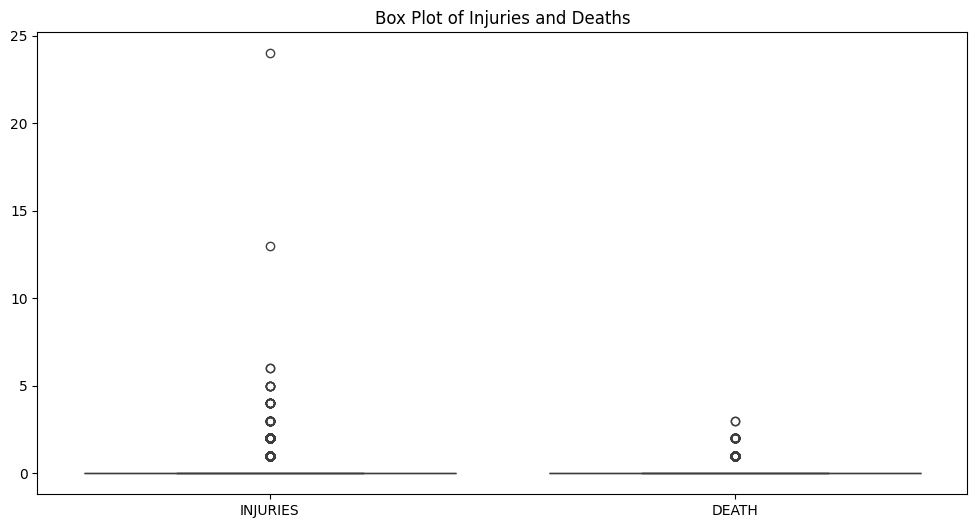

In [112]:
import pandas as pd


#Max: for some reason it throws an error when i tried to read from csv,
#so I changed to to read from excel instead, I hope it's ok. If you can change it back to reading csv without errors, all the better

# df = pd.read_csv('crimeintegrated_cleaned.csv')
df = pd.read_csv('crimeintegrated_cleaned.csv', encoding='latin1')

# Read the Excel file
# df = pd.read_excel('crimeintegrated_cleaned.xlsx')

print(df.describe())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['INJURIES', 'DEATH']])
plt.title('Box Plot of Injuries and Deaths')
plt.show()

Treating Outliers for Injuries and Death

In [113]:
import numpy as np

# Function to calculate outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detecting outliers in 'INJURIES' and 'DEATH'
injuries_outliers_iqr = detect_outliers_iqr(df['INJURIES'])
death_outliers_iqr = detect_outliers_iqr(df['DEATH'])

# Printing the results
print("Injuries Outliers:", injuries_outliers_iqr)
print("Death Outliers:", death_outliers_iqr)

Injuries Outliers: 62        1
77        2
78        1
83        1
84        1
         ..
239205    2
241176    1
242608    3
244012    1
245000    1
Name: INJURIES, Length: 1319, dtype: int64
Death Outliers: 81        1
82        1
92        1
93        1
97        1
         ..
242608    1
243070    1
245000    1
245475    1
246724    1
Name: DEATH, Length: 633, dtype: int64


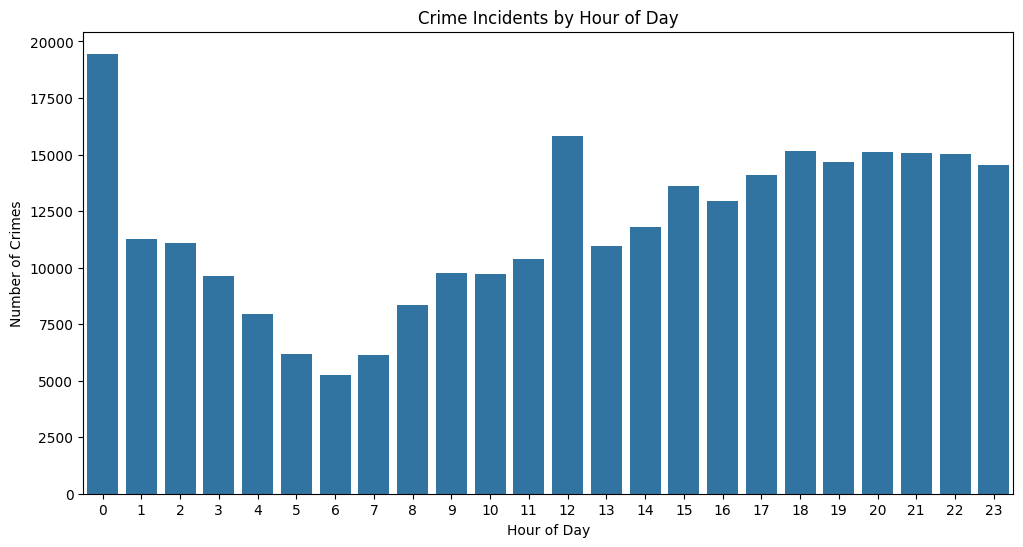

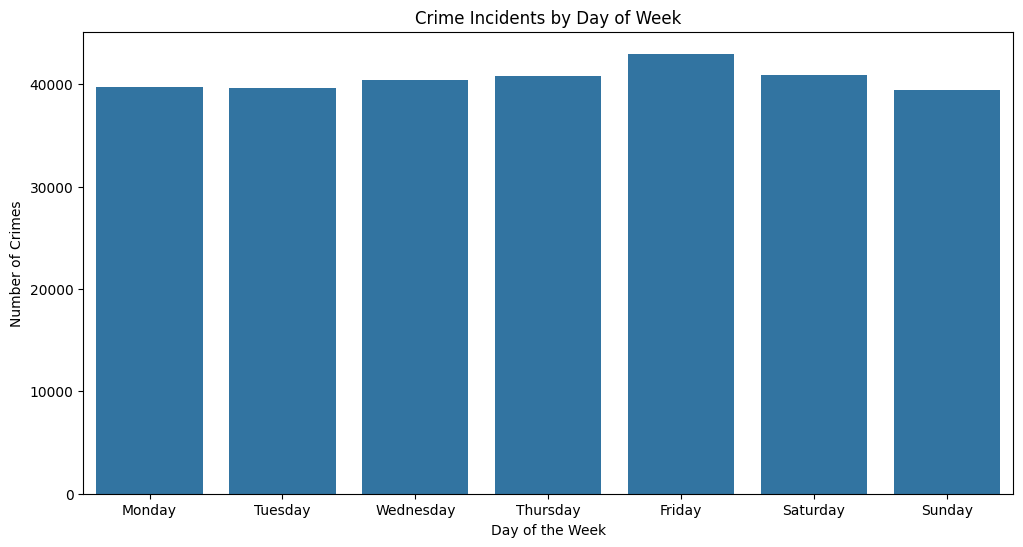

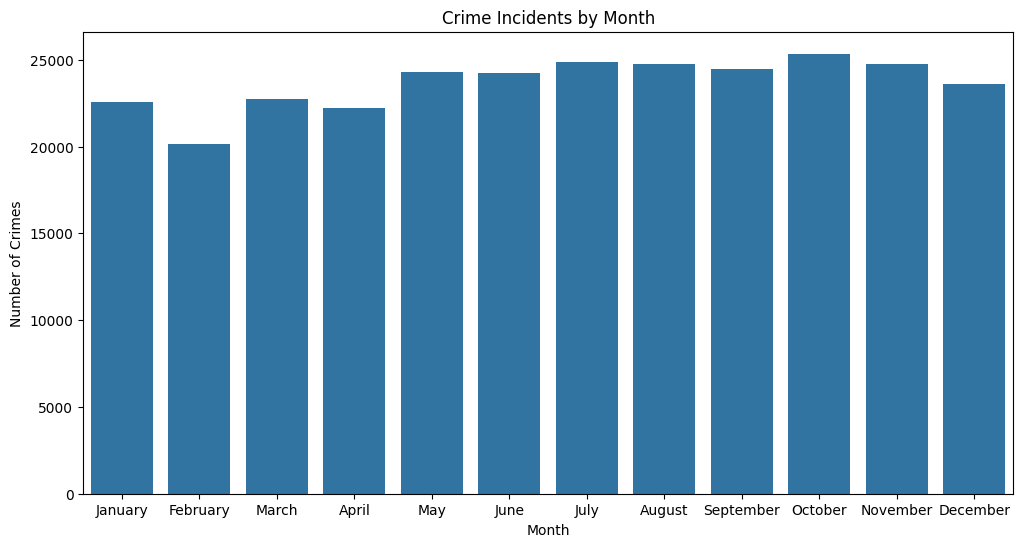

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time of Day Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='OCC_HOUR', data=df)
plt.title('Crime Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()

# Day of the Week Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='OCC_DOW', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crime Incidents by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

# Month Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='OCC_MONTH', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Crime Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9052\2427469183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DIVISION', data=df, order=sorted(df['DIVISION'].unique()), palette='rocket')


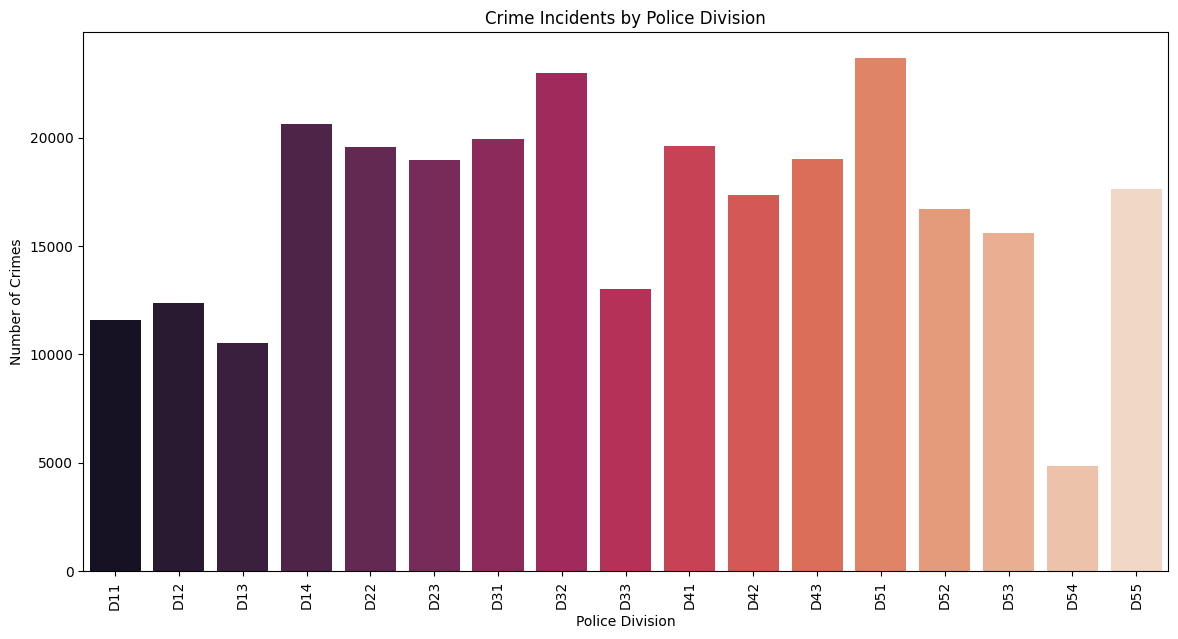

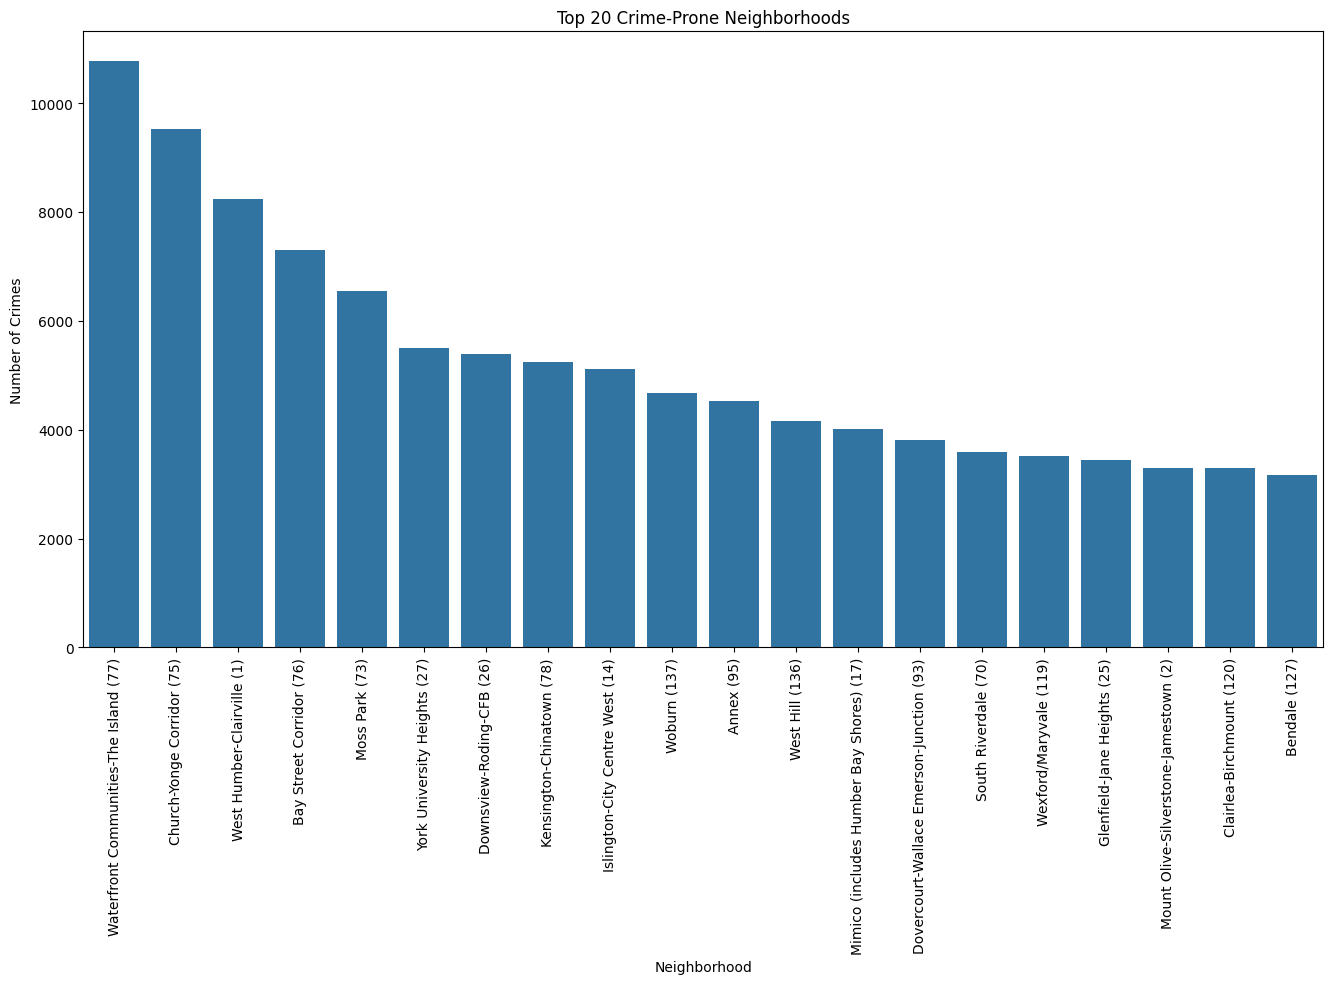

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crime by Division
plt.figure(figsize=(14, 7))
sns.countplot(x='DIVISION', data=df, order=sorted(df['DIVISION'].unique()), palette='rocket')
plt.title('Crime Incidents by Police Division')
plt.xlabel('Police Division')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

# Crime by Neighborhood
plt.figure(figsize=(16, 8))
sns.countplot(x='NEIGHBOURHOOD_140', data=df, order=df['NEIGHBOURHOOD_140'].value_counts().index[:20])  # Top 20 neighborhoods
plt.title('Top 20 Crime-Prone Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9052\1256571500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MCI_CATEGORY', data=df, order=df['MCI_CATEGORY'].value_counts().index, palette='cubehelix')


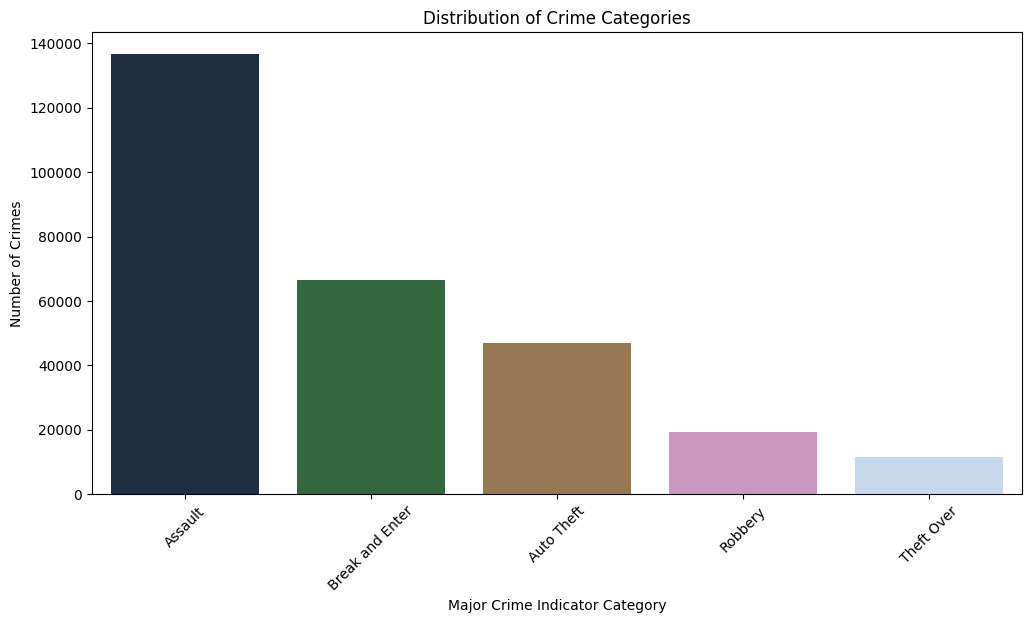

In [116]:
# Overall Crime Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='MCI_CATEGORY', data=df, order=df['MCI_CATEGORY'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Crime Categories')
plt.xlabel('Major Crime Indicator Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9052\1360015388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OFFENCE', data=assault_data, order=assault_data['OFFENCE'].value_counts().index, palette='Set2')


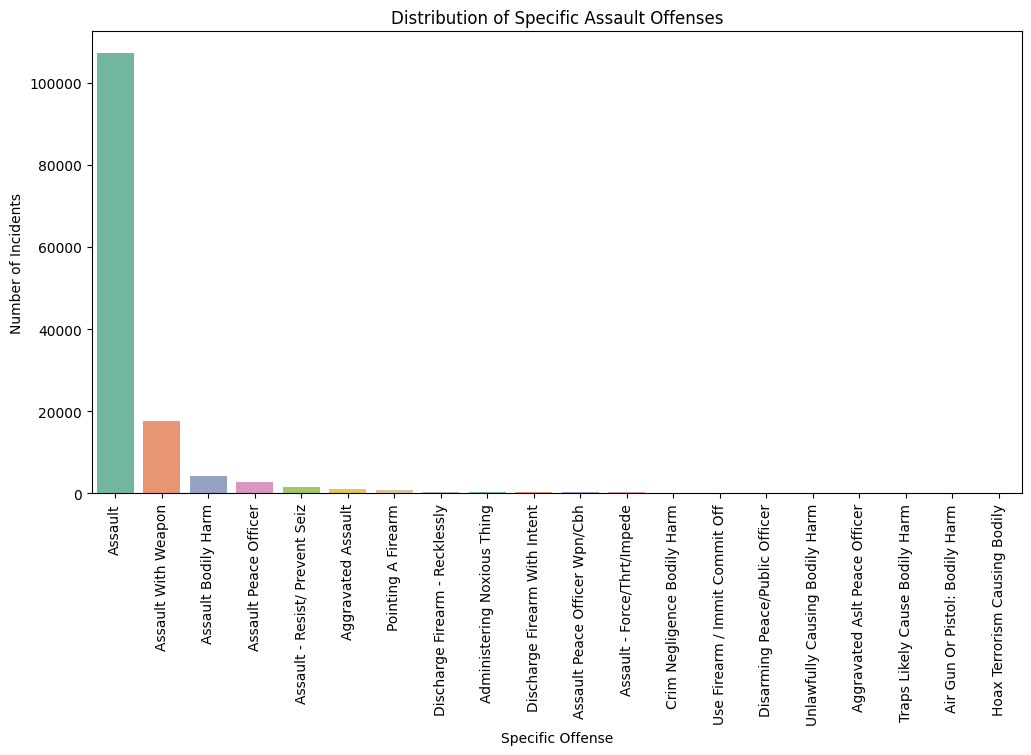

In [117]:
# Filter data for Assault crimes
assault_data = df[df['MCI_CATEGORY'] == 'Assault']

# Plot the distribution of specific assault offenses
plt.figure(figsize=(12, 6))
sns.countplot(x='OFFENCE', data=assault_data, order=assault_data['OFFENCE'].value_counts().index, palette='Set2')
plt.title('Distribution of Specific Assault Offenses')
plt.xlabel('Specific Offense')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

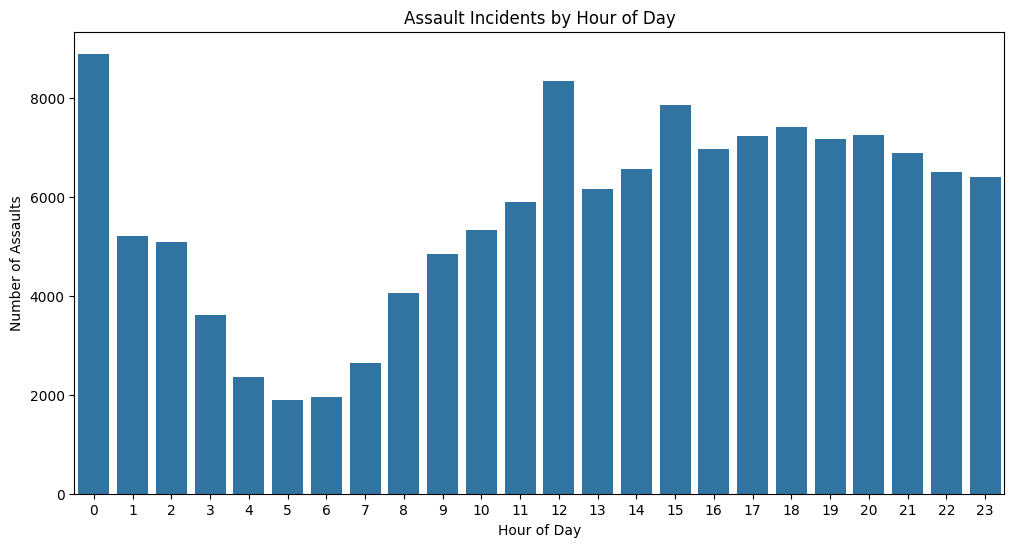

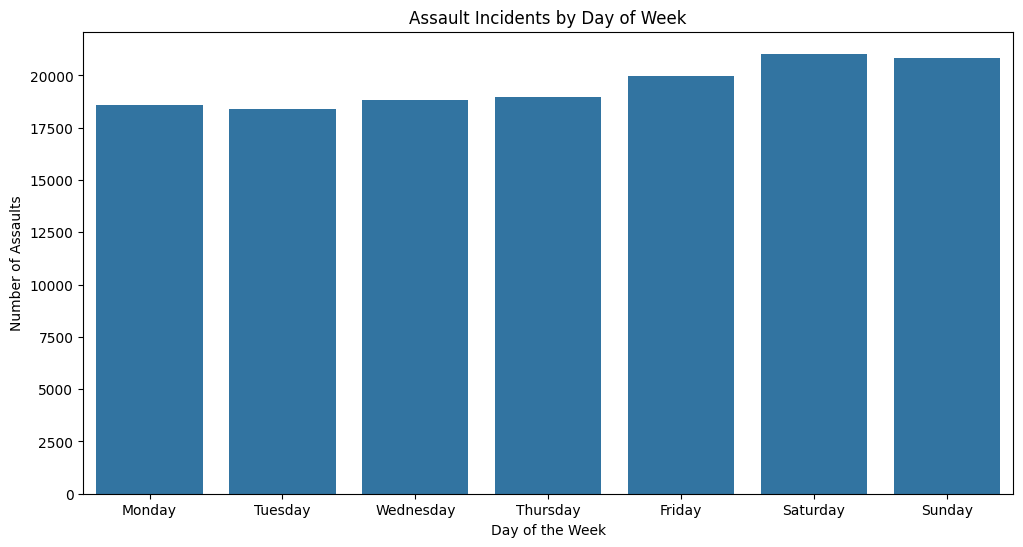

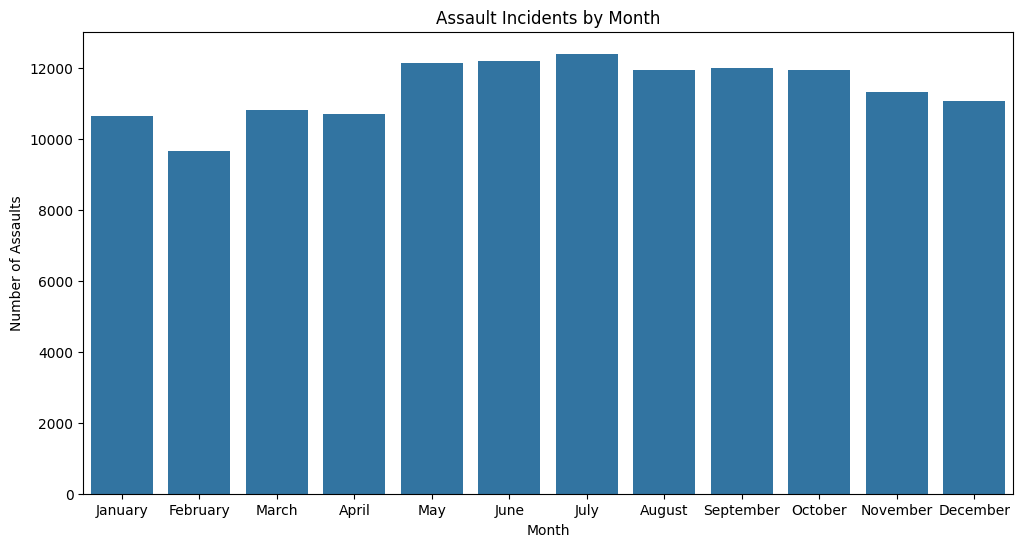

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time of Day for Assaults
plt.figure(figsize=(12, 6))
sns.countplot(x='OCC_HOUR', data=assault_data)
plt.title('Assault Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Assaults')
plt.show()

# Day of the Week for Assaults
plt.figure(figsize=(12, 6))
sns.countplot(x='OCC_DOW', data=assault_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Assault Incidents by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Assaults')
plt.show()

# Month for Assaults
plt.figure(figsize=(12, 6))
sns.countplot(x='OCC_MONTH', data=assault_data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Assault Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Assaults')
plt.show()

#Data Transformation

##Data Normalization and Imputation

In [119]:
df_saved = df

In [120]:
df = df_saved

In [121]:
#Per CHATGPT:
#Data normalization typically refers to scaling numerical data to a standard range or distribution.
#Date columns, however, usually don't require normalization in the same sense as numerical features
#because they represent categorical or ordinal data, not continuous numerical data.

# So I decided to not do normalization of month length.

# Instead I decided to impute all the NaNs in MCI_CATEGORY with 'Death', 'Injury','Both(death&injury)' or 'Gun Dischagre'
# based on the numbers in 'DEATH' and 'INJURY' columns.

# Change values in column 'MCI_CATEGORY' based on values in columns 'DEATH' and 'INJURIES'
df.loc[(df['MCI_CATEGORY'].isna()) & (df['DEATH'] > 0) & (df['INJURIES'] == 0), 'MCI_CATEGORY'] = 'Death'               # Change values in column 'A' to 10 where column 'B' is 'apple' and column 'C' is 'red'
df.loc[(df['MCI_CATEGORY'].isna()) & (df['DEATH'] == 0) & (df['INJURIES'] > 0), 'MCI_CATEGORY'] = 'Injury'              # Change values in column 'A' to 10 where column 'B' is 'apple' and column 'C' is 'red'
df.loc[(df['MCI_CATEGORY'].isna()) & (df['DEATH'] > 0) & (df['INJURIES'] > 0), 'MCI_CATEGORY'] = 'Both(death&injury)'  # Change values in column 'A' to 10 where column 'B' is 'apple' and column 'C' is 'red'
df.loc[(df['MCI_CATEGORY'].isna()) & (df['DEATH'] == 0) & (df['INJURIES'] == 0), 'MCI_CATEGORY'] = 'Gun Dischagre'       # Change values in column 'A' to 10 where column 'B' is 'apple' and column 'C' is 'red'

print(df)
print()

print(df['MCI_CATEGORY'].unique())
print(df['OFFENCE'].unique())
df_with_nan_mci_category = df[df['MCI_CATEGORY'].isna()]
print(df_with_nan_mci_category)

       EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY   OCC_DOW  \
0       GO-20142047470      2000   January        1        1  Saturday   
1       GO-20142600980      2000   January        1        1  Saturday   
2       GO-20143243077      2000   January        1        1  Saturday   
3        GO-2016315569      2000   January        1        1  Saturday   
4        GO-2017773081      2000   January        1        1  Saturday   
...                ...       ...       ...      ...      ...       ...   
283928  GO-20232992732      2023  December       31      365    Sunday   
283929  GO-20232993060      2023  December       31      365    Sunday   
283930  GO-20232993252      2023  December       31      365    Sunday   
283931  GO-20232993321      2023  December       31      365    Sunday   
283932  GO-20232993455      2023  December       31      365    Sunday   

        OCC_HOUR OCC_TIME_RANGE DIVISION     MCI_CATEGORY  \
0              0          Night      D42          

In [122]:
#write  transformed dataframe to a file

##Different Scaling Functions

1. Identify the rows that meet your condition.
1. Randomly select 50 percent of those rows.
1. Drop the selected rows from the DataFrame.

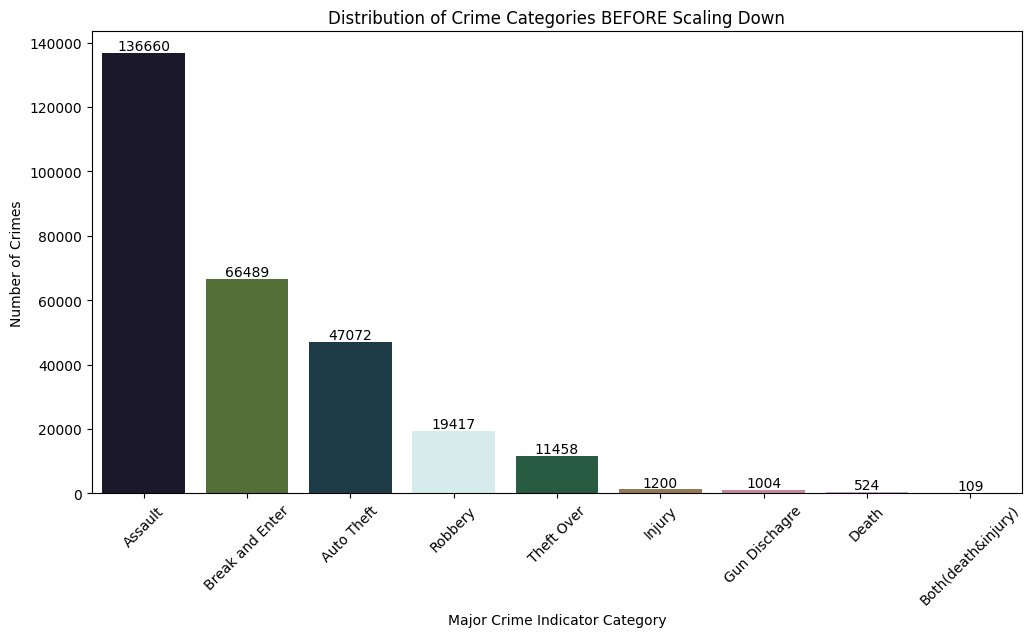

In [123]:
# Overall Crime Category Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='MCI_CATEGORY', hue='MCI_CATEGORY', data=df, order=df['MCI_CATEGORY'].value_counts().index, palette='cubehelix', legend=False)

# Display exact values on the bars as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Crime Categories BEFORE Scaling Down')
plt.xlabel('Major Crime Indicator Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()




---

> ***EVERY TIME YOU RUN FOLLOWING CELL, THE DATA SET GETS REDUCED!!!***



---



In [124]:
# Identify the rows that meet the condition
rows_to_drop_assault = df[df['MCI_CATEGORY'] == 'Assault']
rows_to_drop_be = df[df['MCI_CATEGORY'] == 'Break and Enter']
rows_to_drop_gta = df[df['MCI_CATEGORY'] == 'Auto Theft']
rows_to_drop_robbery = df[df['MCI_CATEGORY'] == 'Robbery']
rows_to_drop_theft = df[df['MCI_CATEGORY'] == 'Theft Over']

# Create a common scaling down factor
SCALER = 0.75

# Calculate the number of rows to drop (SCALER percent of the total rows that meet the condition)
num_rows_to_drop_assault = int(len(rows_to_drop_assault) * SCALER)
num_rows_to_drop_be = int(len(rows_to_drop_be) * SCALER)
num_rows_to_drop_gta = int(len(rows_to_drop_gta) * SCALER)
num_rows_to_drop_robbery = int(len(rows_to_drop_robbery) * SCALER)
num_rows_to_drop_theft = int(len(rows_to_drop_theft) * SCALER)


# Randomly select (SCALER * number) of those rows
rows_to_drop_assault = rows_to_drop_assault.sample(n=num_rows_to_drop_assault, random_state=42)
rows_to_drop_be = rows_to_drop_be.sample(n=num_rows_to_drop_be, random_state=42)
rows_to_drop_gta = rows_to_drop_gta.sample(n=num_rows_to_drop_gta, random_state=42)
rows_to_drop_robbery = rows_to_drop_robbery.sample(n=num_rows_to_drop_robbery, random_state=42)
rows_to_drop_theft = rows_to_drop_theft.sample(n=num_rows_to_drop_theft, random_state=42)

# In the context of pandas' sample() method, the random_state parameter is used to control
# the random number generator that is used to select random elements.
# When you set a specific random_state, you're essentially initializing the random number generator with a particular seed value.
# This ensures that every time you run your code with the same random_state, you'll get the same random selections.

# By setting random_state to a fixed value, your code becomes reproducible.
# It's useful when you want your random selections to be consistent across different runs of your code,
# which is especially important when you're working collaboratively or debugging your code.

# Drop the selected rows from the DataFrame
df.drop(rows_to_drop_assault.index, inplace=True)
df.drop(rows_to_drop_be.index, inplace=True)
df.drop(rows_to_drop_gta.index, inplace=True)
df.drop(rows_to_drop_robbery.index, inplace=True)
df.drop(rows_to_drop_theft.index, inplace=True)


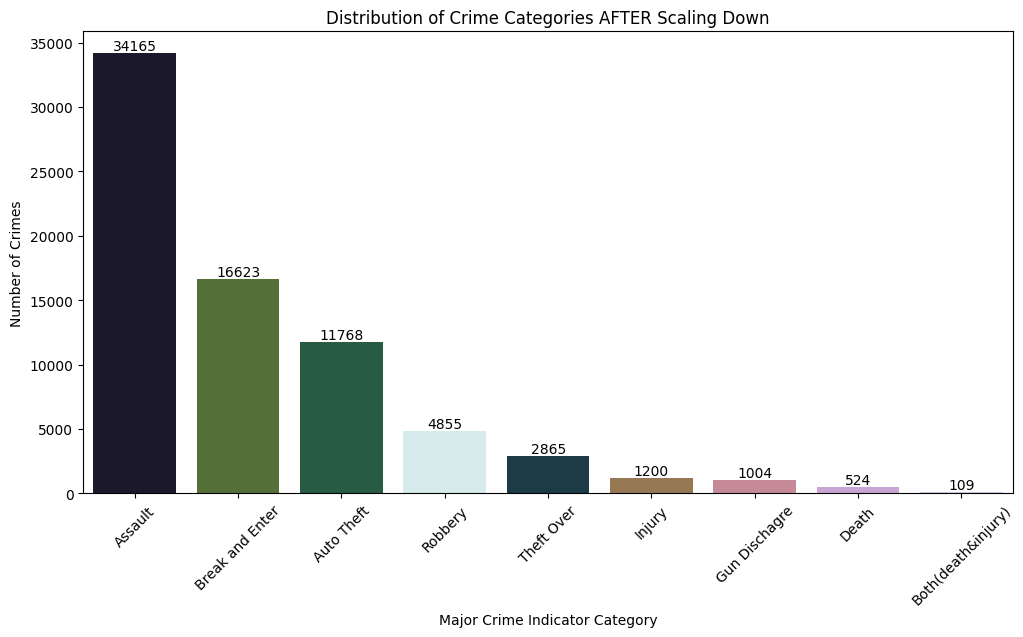

In [125]:
# Overall Crime Category Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='MCI_CATEGORY', hue='MCI_CATEGORY', data=df, order=df['MCI_CATEGORY'].value_counts().index, palette='cubehelix', legend=False)

# Display exact values on the bars as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Crime Categories AFTER Scaling Down')
plt.xlabel('Major Crime Indicator Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


In [126]:
print(df)

       EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY   OCC_DOW  \
4        GO-2017773081      2000   January        1        1  Saturday   
7       GO-20221295206      2000   January        1        1  Saturday   
16      GO-20142771849      2000    August        1      214   Tuesday   
19       GO-2016764686      2001   January        1        1    Monday   
20      GO-20182040978      2001   January        1        1    Monday   
...                ...       ...       ...      ...      ...       ...   
283908  GO-20232990052      2023  December       31      365    Sunday   
283909  GO-20232990380      2023  December       31      365    Sunday   
283912  GO-20232990450      2023  December       31      365    Sunday   
283919  GO-20232991316      2023  December       31      365    Sunday   
283925  GO-20232992273      2023  December       31      365    Sunday   

        OCC_HOUR OCC_TIME_RANGE DIVISION MCI_CATEGORY              OFFENCE  \
4              0          Night  

##Outlier Detection

### Visual Examination

Look at total number of reported crimes per year:

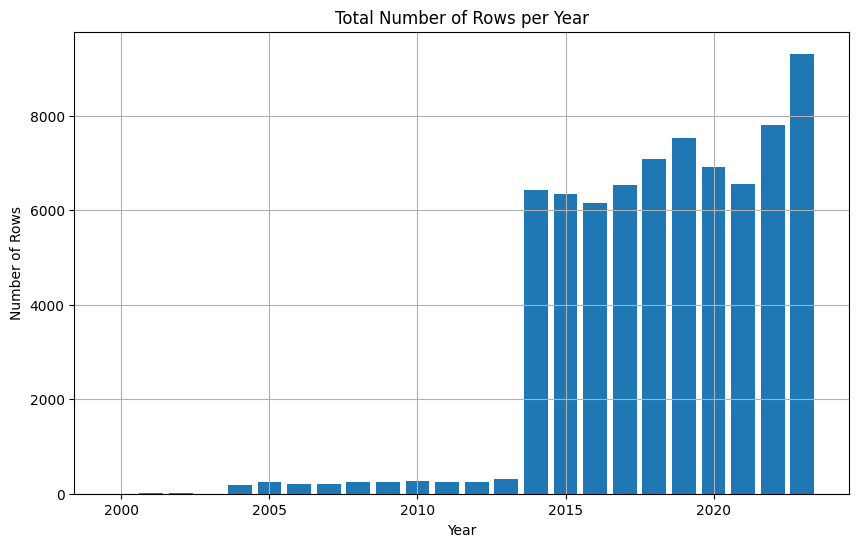

In [127]:
# Group the data by year and count the number of rows for each year
rows_per_year = df.groupby('OCC_YEAR').size()

# Plot the total number of rows per year
plt.figure(figsize=(10, 6))
plt.bar(rows_per_year.index, rows_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Year')
plt.grid(True)
plt.show()

Evidently the enormous jump from 2013 to 2014 stems from implementation of a new reporting protocol in the Toronto police policies rather than a 3000% percent increase in crime. Thus the data before 2014 is not relevant to the modern data and therefore should be regarded as outliers.

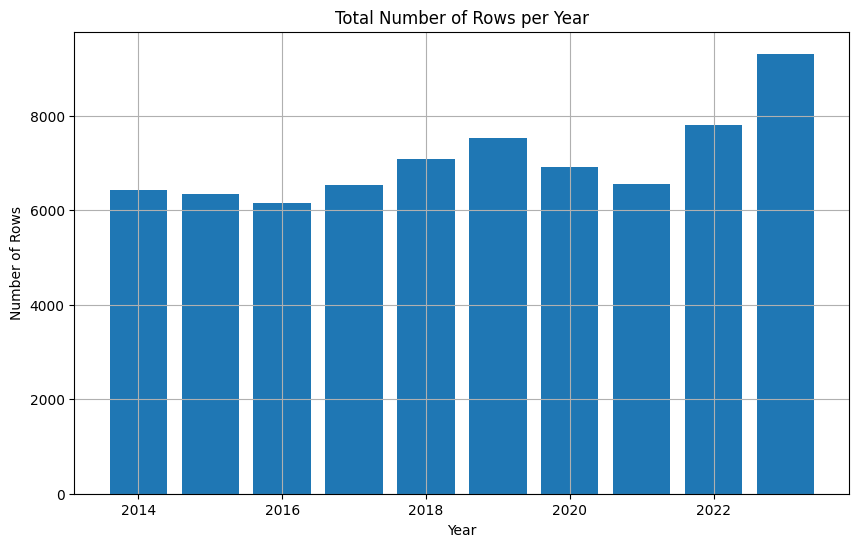

In [128]:
# Save current :
df_all_years_included = df.copy

# Drop all rows where 'OCC_YEAR' is less than 2014
df = df[df['OCC_YEAR'] >= 2014]

# Group the data by year and count the number of rows for each year
rows_per_year_1 = df.groupby('OCC_YEAR').size()

# Show updated plot of the total number of rows per year
plt.figure(figsize=(10, 6))
plt.bar(rows_per_year_1.index, rows_per_year_1.values)
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Year')
plt.grid(True)
plt.show()



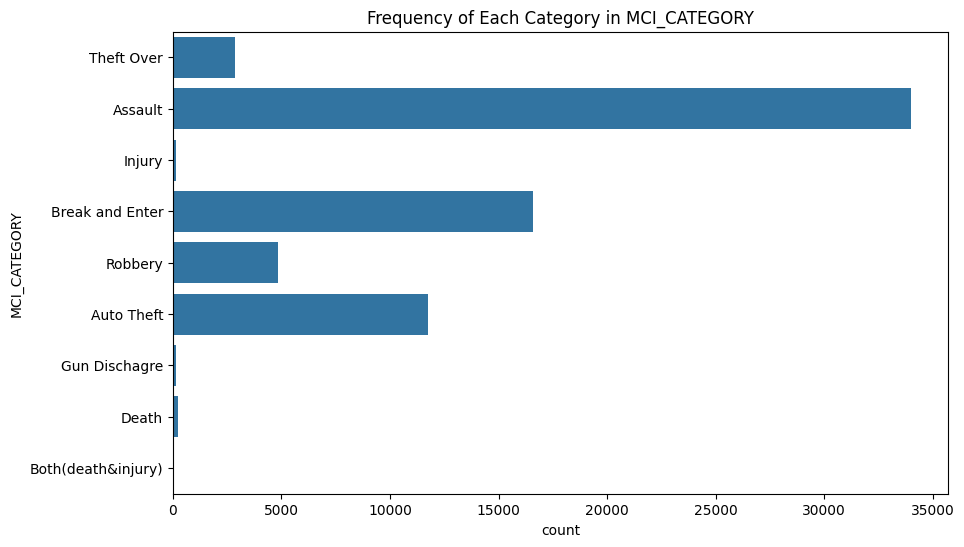

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the frequency of categories in 'MCI_CATEGORY'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='MCI_CATEGORY')
plt.title('Frequency of Each Category in MCI_CATEGORY')
plt.show()

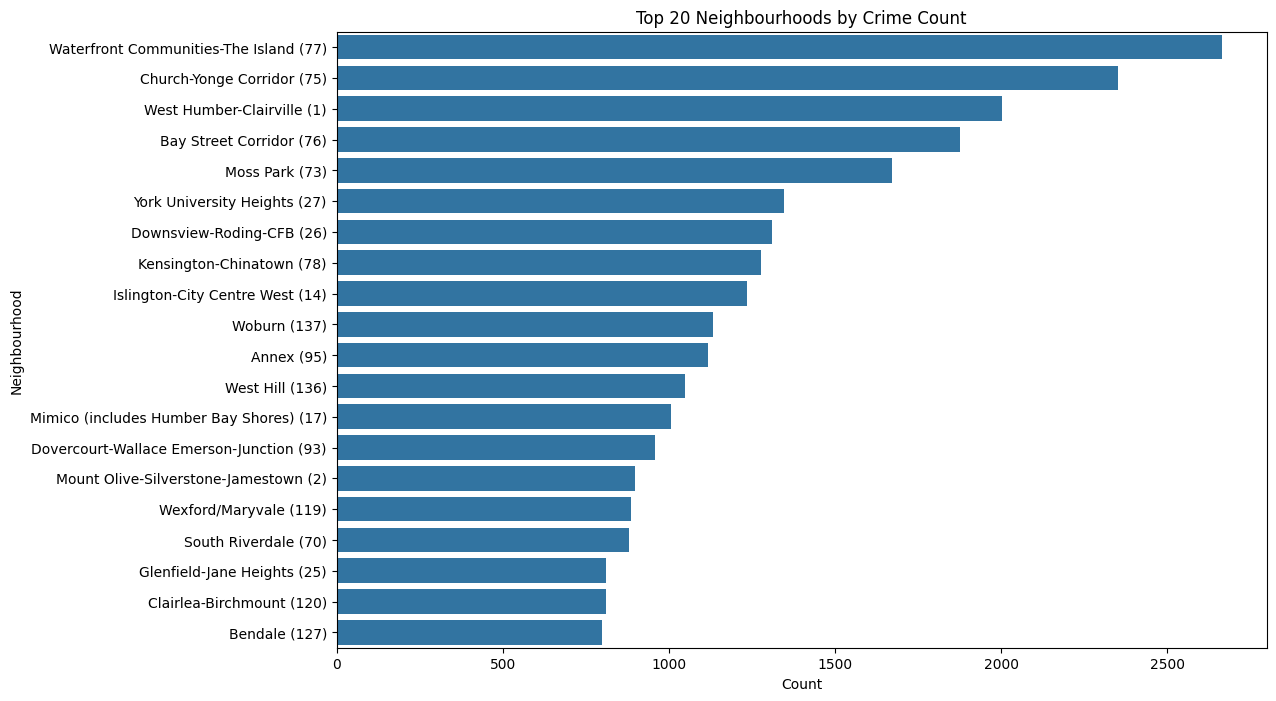

In [130]:
# Crimes in Different Neighbourhoods
# Note: Due to potentially high number of neighbourhoods, we'll display top 20
top_neighbourhoods = df['NEIGHBOURHOOD_140'].value_counts().head(20).index
plt.figure(figsize=(12, 8))
sns.countplot(y='NEIGHBOURHOOD_140', data=df, order=top_neighbourhoods)
plt.title('Top 20 Neighbourhoods by Crime Count')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9052\264600898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCC_DOW'] = df['OCC_DOW'].str.strip().str.capitalize()  # This removes leading/trailing spaces and capitalizes the first letter


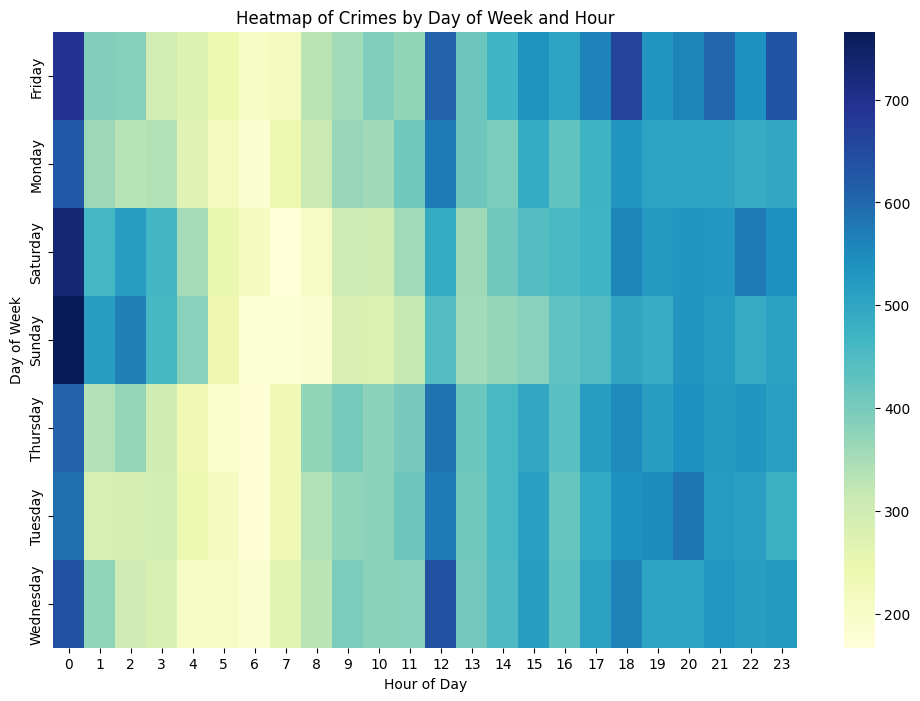

In [131]:
# Heatmap of Crimes by Day of Week and Hour
# Clean the 'OCC_DOW' column to ensure consistency
df['OCC_DOW'] = df['OCC_DOW'].str.strip().str.capitalize()  # This removes leading/trailing spaces and capitalizes the first letter
crime_heatmap_data = df.groupby(['OCC_DOW', 'OCC_HOUR']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, cmap="YlGnBu")
plt.title('Heatmap of Crimes by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

In [132]:
# Frequency analysis for individual columns
frequency_mci_category = df['MCI_CATEGORY'].value_counts()
frequency_occ_year = df['OCC_YEAR'].value_counts()
frequency_occ_hour = df['OCC_HOUR'].value_counts()
frequency_occ_dow = df['OCC_DOW'].value_counts()

# Display the frequency counts
print("Frequency counts for MCI_CATEGORY:\n", frequency_mci_category)
print("\nFrequency counts for OCC_YEAR:\n", frequency_occ_year)
print("\nFrequency counts for OCC_HOUR:\n", frequency_occ_hour)
print("\nFrequency counts for OCC_DOW:\n", frequency_occ_dow)

Frequency counts for MCI_CATEGORY:
 MCI_CATEGORY
Assault               34000
Break and Enter       16601
Auto Theft            11759
Robbery                4850
Theft Over             2838
Death                   252
Gun Dischagre           164
Injury                  149
Both(death&injury)       62
Name: count, dtype: int64

Frequency counts for OCC_YEAR:
 OCC_YEAR
2023    9313
2022    7812
2019    7534
2018    7088
2020    6919
2021    6560
2017    6531
2014    6423
2015    6336
2016    6159
Name: count, dtype: int64

Frequency counts for OCC_HOUR:
 OCC_HOUR
0     4657
12    3922
18    3908
20    3753
21    3732
23    3694
22    3649
19    3617
17    3471
15    3376
16    3105
14    3011
13    2780
2     2766
1     2727
11    2648
9     2479
10    2463
3     2440
8     2071
4     1968
5     1568
7     1542
6     1328
Name: count, dtype: int64

Frequency counts for OCC_DOW:
 OCC_DOW
Friday       10781
Saturday     10218
Thursday     10100
Wednesday    10047
Tuesday       9886
Monday  

Based on above analysis, we can consider the following as outliers:
Death                   524
Both(death&injury)      109



1.   Death                   524
2. Both(death&injury)        109
3. 2001       7
4. 2002       6
5. 2003       4
6. 2000       3








### Statistical Tests

In [133]:
from scipy.stats import zscore

# Apply Z-score for OCC_YEAR and OCC_HOUR
df['Z_SCORE_YEAR'] = zscore(df['OCC_YEAR'])
df['Z_SCORE_HOUR'] = zscore(df['OCC_HOUR'])

# Define outliers using Z-score
outliers_z_year = df[(df['Z_SCORE_YEAR'] > 3) | (df['Z_SCORE_YEAR'] < -3)]
outliers_z_hour = df[(df['Z_SCORE_HOUR'] > 3) | (df['Z_SCORE_HOUR'] < -3)]

# Calculate IQR for OCC_YEAR and OCC_HOUR
Q1_year = df['OCC_YEAR'].quantile(0.25)
Q3_year = df['OCC_YEAR'].quantile(0.75)
IQR_year = Q3_year - Q1_year

lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

Q1_hour = df['OCC_HOUR'].quantile(0.25)
Q3_hour = df['OCC_HOUR'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

lower_bound_hour = Q1_hour - 1.5 * IQR_hour
upper_bound_hour = Q3_hour + 1.5 * IQR_hour

# Define outliers using IQR
outliers_iqr_year = df[(df['OCC_YEAR'] < lower_bound_year) | (df['OCC_YEAR'] > upper_bound_year)]
outliers_iqr_hour = df[(df['OCC_HOUR'] < lower_bound_hour) | (df['OCC_HOUR'] > upper_bound_hour)]

# Combine the results into a dictionary for easier presentation
outliers = {
    'Z_Score_Year': outliers_z_year[['OCC_YEAR', 'Z_SCORE_YEAR']],
    'Z_Score_Hour': outliers_z_hour[['OCC_HOUR', 'Z_SCORE_HOUR']],
    'IQR_Year': outliers_iqr_year[['OCC_YEAR']],
    'IQR_Hour': outliers_iqr_hour[['OCC_HOUR']]
}

outliers

C:\Users\User\AppData\Local\Temp\ipykernel_9052\1190386810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z_SCORE_YEAR'] = zscore(df['OCC_YEAR'])
C:\Users\User\AppData\Local\Temp\ipykernel_9052\1190386810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z_SCORE_HOUR'] = zscore(df['OCC_HOUR'])


{'Z_Score_Year': Empty DataFrame
 Columns: [OCC_YEAR, Z_SCORE_YEAR]
 Index: [],
 'Z_Score_Hour': Empty DataFrame
 Columns: [OCC_HOUR, Z_SCORE_HOUR]
 Index: [],
 'IQR_Year': Empty DataFrame
 Columns: [OCC_YEAR]
 Index: [],
 'IQR_Hour': Empty DataFrame
 Columns: [OCC_HOUR]
 Index: []}

From above analysis, year 2000, 2001 and 2008 are considered as outliers.

## Feature Analysis

### Chi Sqaure tests

In [134]:
# Perform Chi-square test between 'MCI_CATEGORY' and 'OCC_DOW'
contingency_mci_dow = pd.crosstab(df['MCI_CATEGORY'], df['OCC_DOW'])

# Chi-square test
chi2_stat_mci_dow, p_val_mci_dow, dof_mci_dow, _ = chi2_contingency(contingency_mci_dow)

chi2_stat_mci_dow, p_val_mci_dow, dof_mci_dow

(272.7000156699529, 3.5317600317189835e-33, 48)

The very high Chi-square statistic and a p-value of essentially 0 indicate that there is a statistically significant association between the type of crime (MCI_CATEGORY) and the day of the week (OCC_DOW). This suggests that certain types of crimes are more or less likely to occur on specific days of the week.

Given this significant result, it's clear that the two variables are not independent of each other.

In [135]:
# Perform Chi-square test between 'MCI_CATEGORY' and 'OCC_MONTH'
contingency_mci_month = pd.crosstab(df['MCI_CATEGORY'], df['OCC_MONTH'])

# Chi-square test
chi2_stat_mci_month, p_val_mci_month, dof_mci_month, _ = chi2_contingency(contingency_mci_month)

# Perform Chi-square test between 'MCI_CATEGORY' and 'OCC_TIME_RANGE'
contingency_mci_time = pd.crosstab(df['MCI_CATEGORY'], df['OCC_TIME_RANGE'])

# Chi-square test
chi2_stat_mci_time, p_val_mci_time, dof_mci_time, _ = chi2_contingency(contingency_mci_time)

chi2_stat_mci_month, p_val_mci_month, dof_mci_month, chi2_stat_mci_time, p_val_mci_time, dof_mci_time

(196.51673723218295, 2.8968234730888813e-10, 88, 3095.940599170543, 0.0, 24)

For MCI_CATEGORY vs. OCC_MONTH:
The results indicate that there is a statistically significant association between crime categories and the month of the year, though the relationship is not as strong as with the day of the week. This could suggest that certain types of crimes are more likely to occur in specific months.

For MCI_CATEGORY vs. OCC_TIME_RANGE:
The very high Chi-square statistic and a p-value of 0.0 for the time range suggest a very strong association between the type of crime and the time range in which it occurs. This means certain crimes are much more likely to occur during particular times of the day.

### Cramer's V for Categorical Association

MCI_CATEGORY and OCC_TIME_RANGE (0.13): This is the strongest association visible here, indicating there’s some relationship between the crime category and the time range of the crime occurrence.

MCI_CATEGORY and OCC_HOUR (0.1): This is the second strongest association visible here, ofcource on the lower end.

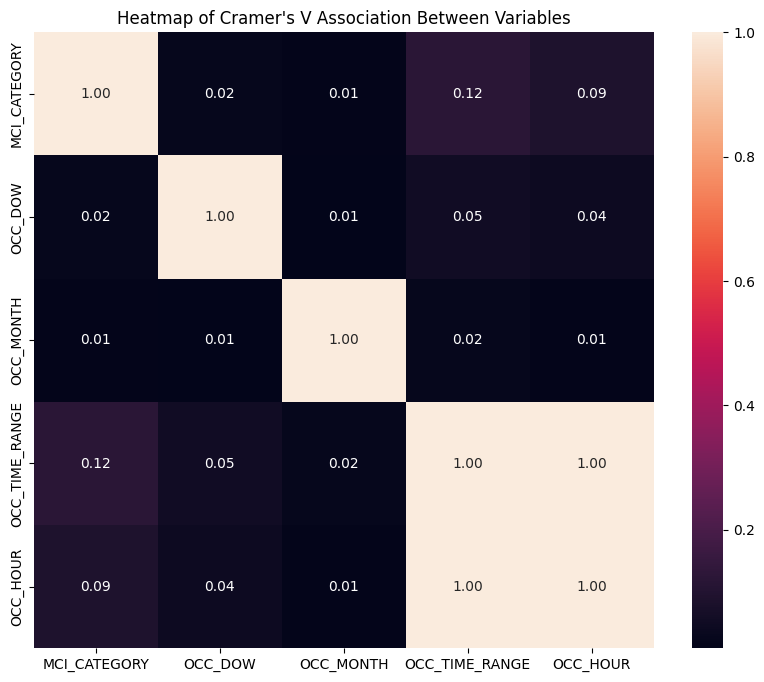

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for each pair of categorical variables
categorical_columns = ['MCI_CATEGORY', 'OCC_DOW', 'OCC_MONTH', 'OCC_TIME_RANGE', 'OCC_HOUR']
assoc_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                            index=categorical_columns,
                            columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        assoc_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(assoc_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Cramer\'s V Association Between Variables')
plt.show()

In [137]:
#Event ID has squiggles in its name for some reason, so i'm gonna rename it
df.rename(columns={'ï»¿EVENT_UNIQUE_ID': 'EVENT_UNIQUE_ID'}, inplace=True)

print(df.columns)

Index(['EVENT_UNIQUE_ID', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY',
       'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE', 'DIVISION', 'MCI_CATEGORY',
       'OFFENCE', 'DEATH', 'INJURIES', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'Z_SCORE_YEAR', 'Z_SCORE_HOUR'],
      dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_9052\786048197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'ï»¿EVENT_UNIQUE_ID': 'EVENT_UNIQUE_ID'}, inplace=True)


### PCA for Dimensionality reduction

c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE', 'DIVISION', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'Z_SCORE_YEAR', 'Z_SCORE_HOUR']


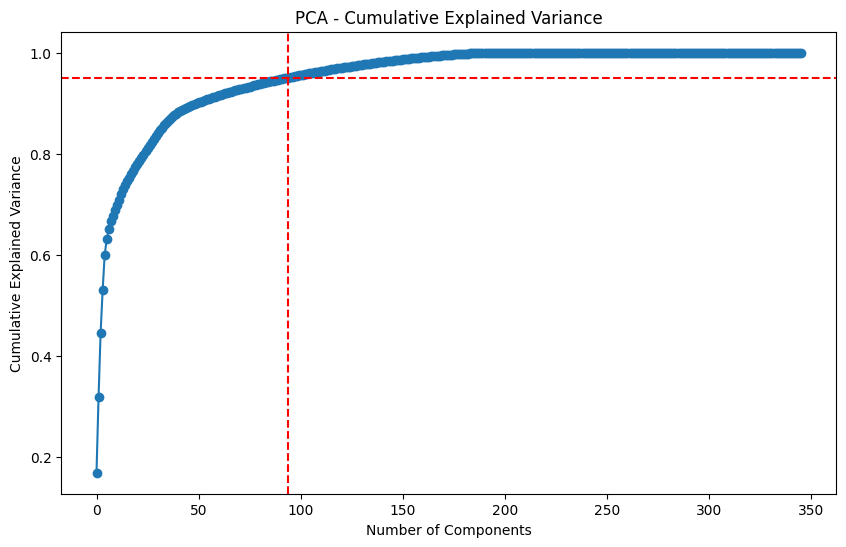

Number of components to retain 95% variance: 94


In [138]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA


df = df.drop(columns=['EVENT_UNIQUE_ID','OFFENCE', 'DEATH','INJURIES'], axis=1)

# List of categorical features (excluding MCI_CATEGORY)
categorical_features = ['OCC_MONTH', 'OCC_DOW', 'OCC_TIME_RANGE', 'DIVISION', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140']
numerical_features = [col for col in df.columns if col not in categorical_features]
numerical_features.remove("MCI_CATEGORY")

# Standardizing the numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(df[numerical_features])

# One-hot encoding the categorical data with sparse matrix
encoder = OneHotEncoder(sparse=False)
X_categorical_encoded = encoder.fit_transform(df[categorical_features])

# Combining the standardized numerical and OHE categorical data
X_combined = np.hstack([X_numerical_scaled, X_categorical_encoded])

print(df.columns.values.tolist())

# Applying PCA to capture 100% of variance for analysis
pca = PCA()
principal_components = pca.fit_transform(X_combined)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Find the number of components needed to retain 95% of the variance
k = np.argmax(explained_variance >= 0.95) + 1

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=k, color='r', linestyle='--')
plt.show()

print(f"Number of components to retain 95% variance: {k}")


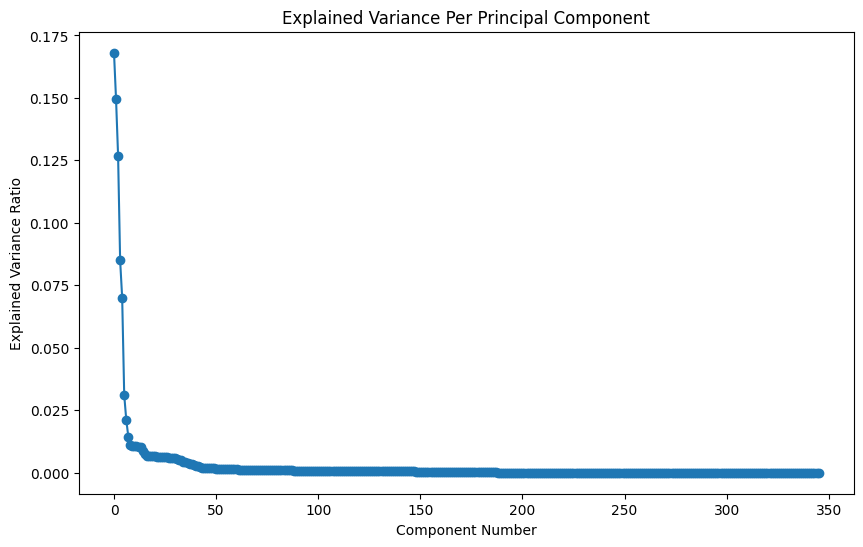

In [139]:
import matplotlib.pyplot as plt

# Plotting the explained variance per component
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Per Principal Component')
plt.show()

Steep Decline: The initial steep decline in explained variance ratio suggests that the first few components capture the majority of the variance in the data.

Elbow Point: The plot appears to have an "elbow" around the 10th component, after which the contribution of each additional component to the explained variance flattens out significantly.

Long Tail: After this elbow point, the long tail of the plot indicates that the remaining components each add very little to the explained variance. Including these would not contribute significantly to the model but would add complexity.

In [140]:
explained_variance_by_10_components = pca.explained_variance_ratio_[:10].sum()
print(f"The first 10 components explain {explained_variance_by_10_components:.2f} of the variance.")

The first 10 components explain 0.69 of the variance.


#Machine Learning

##Select and Train the Model

* **Data Splitting:** Split the data into training, validation, and testing sets.
* **Choose a Model:** Select an appropriate algorithm based on the problem type and data characteristics.
* **Train the Model:** Use the training data to train the model on the target variable.

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

dt_param_grid = {'max_depth': [None, 10, 20, 30, 50]}

classifiers = [
    (DecisionTreeClassifier(), dt_param_grid)
     ]

best_model = None
best_precision = 0
best_recall = 0
best_f1 = 0

# Select the first k principal components
X_selected = principal_components[:, :k]

# # Select all rows where 'OCC_YEAR' is 2023 or later as the testing set
# testing_set = df[df['OCC_YEAR'] >= 2023]

# # Split the testing set into features (X_test) and target (y_test)
# X_test = testing_set[X_selected]
# y_test = testing_set['MCI_CATEGORY']

# # Drop the testing set rows from the original DataFrame to obtain the training set
# training_set = df.drop(testing_set.index)

# # Split the training set into features (X_train) and target (y_train)
# X_train = training_set[X_selected]
# y_train = training_set['MCI_CATEGORY']

# OLDER VERSION OF SPLITTING COMMENTED OUT:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, df['MCI_CATEGORY'], test_size=0.2, random_state=42)

# Loop through each classifier
for clf, param_grid in classifiers:
    model = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
    model.fit(X_train, y_train)

    # Get the best score and model
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Classifier: {clf.__class__.__name__}")
    print("Best Parameters:")
    for param_name, param_value in model.best_params_.items():
        print(f"- {param_name}: {param_value}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()

    # Update best_model and best_score if the current model is better
    if f1 > best_f1:
        best_model = model
        best_f1 = f1

Classifier: DecisionTreeClassifier
Best Parameters:
- max_depth: 10
Precision: 0.4285997986258063
Recall: 0.495790590732225
F1-score: 0.42581464949880893



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Minimal amount of data cleaning for training Raw Data



In [142]:
import pickle 

data = {
    "model": best_model,
    "label_encoder": le
}

# Save to file
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(data, file)

2024-04-24 21:19:40.589 
  command:

    streamlit run C:\Users\User\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [74]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("crime_integrated.csv")

# Most minimal amount of data cleaning needed for the encoding process to work
raw_df = raw_df.drop(raw_df[raw_df['NEIGHBOURHOOD_158'].str.contains('NSA', na=False)].index)
raw_df = raw_df.drop(raw_df[raw_df['NEIGHBOURHOOD_140'].str.contains('NSA', na=False)].index)

# CHECK THE %AGE OF NSA IN COLUMNS, IF ANY
total = (raw_df == 'NSA').sum().sort_values(ascending=False)
percent = ((raw_df == 'NSA').sum() / raw_df['DEATH'].count()).sort_values(ascending=False)
missing_data_1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total = (raw_df == 0).sum().sort_values(ascending=False)
percent = ((raw_df == 0).sum() / df['OCC_TIME_RANGE'].count()).sort_values(ascending=False)
missing_data_1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

raw_df = raw_df[raw_df['OCC_DAY'] != 0]

# Identify rows in df where MCI_CATEGORY is empty
missing_category_rows = mci[mci['MCI_CATEGORY'].isnull()]

merged_df = missing_category_rows.merge(mci[['EVENT_UNIQUE_ID', 'MCI_CATEGORY', 'OFFENCE']], on='EVENT_UNIQUE_ID', how='left')

merged_df = merged_df.drop(columns=['MCI_CATEGORY_x', 'OFFENCE_x'])
merged_df = merged_df.rename(columns={'MCI_CATEGORY_y': 'MCI_CATEGORY', 'OFFENCE_y': 'OFFENCE'})

# Update missing values in the original DataFrame
mci['MCI_CATEGORY'] = merged_df['MCI_CATEGORY'].fillna(mci['MCI_CATEGORY'])
mci['OFFENCE'] = merged_df['OFFENCE'].fillna(mci['OFFENCE'])

duplicate_rows = raw_df[raw_df['EVENT_UNIQUE_ID'].duplicated()]

#removing duplicates
raw_df = raw_df.drop_duplicates(subset='EVENT_UNIQUE_ID', keep=False)
raw_df.describe()


,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,DEATH,INJURIES
count,283933.000000,283933.000000,283933.000000,283933.000000,283933.000000,283933.000000
mean,2018.684024,15.506951,186.675969,12.498177,0.002367,0.005716
std,3.079687,8.880912,104.270809,7.233457,0.051478,0.104147
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2016.000000,8.000000,98.000000,7.000000,0.000000,0.000000
50%,2019.000000,16.000000,189.000000,14.000000,0.000000,0.000000
75%,2021.000000,23.000000,277.000000,19.000000,0.000000,0.000000
max,2023.000000,31.000000,366.000000,23.000000,3.000000,24.000000


In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA


raw_df = raw_df.drop(columns=['EVENT_UNIQUE_ID','OFFENCE', 'DEATH','INJURIES'], axis=1)

# List of categorical features
categorical_features_raw = ['OCC_MONTH', 'OCC_DOW', 'OCC_TIME_RANGE', 'DIVISION', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140']
numerical_features_raw = [col for col in raw_df.columns if col not in categorical_features]
numerical_features_raw.remove('MCI_CATEGORY')

# Standardizing the numerical features
scaler = StandardScaler()
X_numerical_scaled_raw = scaler.fit_transform(raw_df[numerical_features_raw])

# One-hot encoding the categorical data with sparse matrix
encoder_raw = OneHotEncoder(sparse=False)
X_categorical_encoded_raw = encoder_raw.fit_transform(raw_df[categorical_features_raw])

# Combining the standardized numerical and OHE categorical data
X_combined_raw = np.hstack([X_numerical_scaled_raw, X_categorical_encoded_raw])

# Applying PCA to capture 100% of variance for analysis
pca_raw = PCA()
principal_components_raw = pca_raw.fit_transform(X_combined_raw)
explained_variance_raw = pca.explained_variance_ratio_.cumsum()

# Find the number of components needed to retain 95% of the variance
k_raw = np.argmax(explained_variance >= 0.95) + 1


c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_selected_raw = principal_components_raw[:, :k_raw]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_raw, raw_df['MCI_CATEGORY'], test_size=0.2, random_state=42)
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.fit_transform(y_pred)

y_pred = best_model.predict(X_test)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")



#Data Visualization and ETL

##Use of Different Tools

##ETL To Find Features

## Dashboard

# Presentation